In [ ]:
%%shell
jupyter nbconvert --to html /content/Lab_1Group_5.ipynb

[NbConvertApp] Converting notebook /content/Lab_1Group_5.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 95 image(s).
[NbConvertApp] Writing 4520379 bytes to /content/Lab_1Group_5.html


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import time

from google.colab import files #save plots

np.random.seed(42)

# Task 1: Dataset creation



INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31507 entries, 0 to 31506
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Flow Duration           31507 non-null  int64  
 1   Flow IAT Mean           31507 non-null  float64
 2   Fwd PSH Flags           31507 non-null  int64  
 3   Bwd Packet Length Mean  31507 non-null  float64
 4   Bwd Packet Length Max   31507 non-null  int64  
 5   Flow Bytes/s            31480 non-null  float64
 6   Down/Up Ratio           31507 non-null  int64  
 7   SYN Flag Count          31507 non-null  int64  
 8   Fwd Packet Length Mean  31507 non-null  float64
 9   Fwd IAT Std             31507 non-null  float64
 10  Packet Length Mean      31507 non-null  float64
 11  Fwd Packet Length Max   31507 non-null  int64  
 12  Subflow Fwd Packets     31507 non-null  int64  
 13  Flow Packets/s          31480 non-null  float64
 14  Total Fwd Packets       31507 n

/tmp/ipython-input-1293461269.py:5: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


None

Describe:


,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port
count,3.150700e+04,3.150700e+04,31507.000000,31507.000000,31507.000000,3.148000e+04,31507.000000,31507.000000,31507.000000,3.150700e+04,31507.000000,31507.000000,31507.000000,3.148000e+04,31507.000000,31507.000000
mean,1.647581e+07,1.438258e+06,0.038277,310.232250,896.532040,1.432447e+06,0.639382,0.038277,44.150959,4.653801e+06,163.155706,170.496652,6.181293,8.224087e+04,6.181293,7367.544292
std,3.526316e+07,4.122202e+06,0.191868,605.892466,1945.454241,NaN,0.531334,0.191868,115.215481,1.185644e+07,290.189858,501.331438,109.450416,NaN,109.450416,17104.518207
min,-1.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000,-1.200000e+07,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,-2.000000e+06,1.000000,0.000000
25%,6.500000e+01,5.500000e+01,0.000000,5.500000,6.000000,1.199411e+02,0.000000,0.000000,2.000000,0.000000e+00,3.333333,2.000000,1.000000,2.007469e+00,1.000000,53.000000
50%,2.427100e+04,8.096333e+03,0.000000,51.000000,56.000000,4.826396e+03,1.000000,0.000000,32.000000,0.000000e+00,47.800000,35.000000,2.000000,1.572409e+02,2.000000,80.000000
75%,5.216842e+06,5.558727e+05,0.000000,176.000000,271.000000,1.538462e+05,1.000000,0.000000,50.000000,7.627202e+05,112.000000,198.000000,5.000000,3.174603e+04,5.000000,1066.000000
max,1.199985e+08,1.140000e+08,1.000000,3865.000000,11595.000000,2.070000e+09,10.000000,1.000000,3431.806400,8.280000e+07,1903.272700,23360.000000,18605.000000,3.000000e+06,18605.000000,65533.000000


isna:
Flow Duration              0
Flow IAT Mean              0
Fwd PSH Flags              0
Bwd Packet Length Mean     0
Bwd Packet Length Max      0
Flow Bytes/s              27
Down/Up Ratio              0
SYN Flag Count             0
Fwd Packet Length Mean     0
Fwd IAT Std                0
Packet Length Mean         0
Fwd Packet Length Max      0
Subflow Fwd Packets        0
Flow Packets/s            27
Total Fwd Packets          0
Destination Port           0
Label                      0
dtype: int64
Number of rows before removing null values 31507
Number of rows after removing null values 31480
Number of rows before removing duplicates 31480
Number of rows after removing duplicates 29386
Train set before scaling:


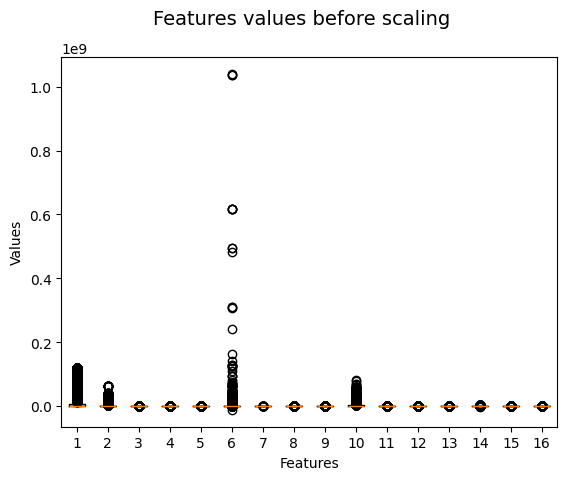

Train set after scaling:


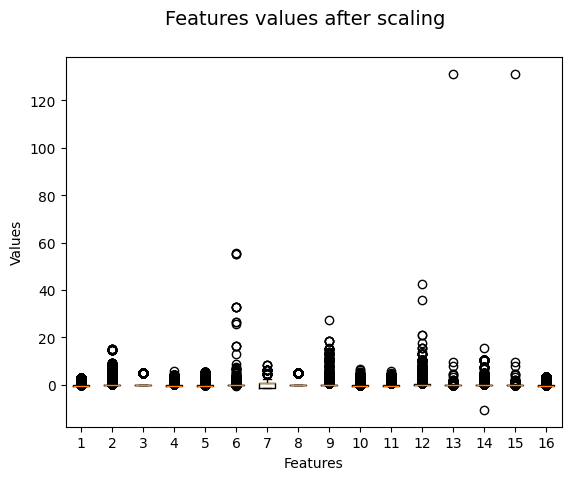

Number of samples of class 0 in the training set:
11515
Number of samples of class 1 in the training set:
866
Number of samples of class 2 in the training set:
2292
Number of samples of class 3 in the training set:
2958


In [ ]:
# Read the dataset
df = pd.read_csv(f'/content/dataset_lab_1.csv')

# Set the option that sets all infinites to Nan for further processing
pd.set_option('mode.use_inf_as_na', True)

print(f"\n{'='*40}")
print("INFO:")
print(f"{'='*40}")
display(df.info())

print(f"{'='*40}")
print("Describe:")
print(f"{'='*40}")
display(df.describe())

print(f"{'='*40}")
print("isna:")
print(f"{'='*40}")
print(df.isna().sum())        # Count of NaNs per column

#drop null values
print("Number of rows before removing null values", len(df))
df = df.dropna()
print("Number of rows after removing null values", len(df))

#drop duplicates
print("Number of rows before removing duplicates", len(df))
df = df.drop_duplicates()
print("Number of rows after removing duplicates", len(df))
# Q1: How many samples did you have before and after removing missing and duplicates entries?


# portScanCount = (df['Label'] == 'PortScan').sum()
# print(f'PortScan count: {portScanCount}')

# Encode labels
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

#Split the dataset
X = df[df.columns[:-1]].values
y = df['Label'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"{'='*40}")
print("Train set before scaling:")
print(f"{'='*40}")


fig = plt.figure()
fig.suptitle('Features values before scaling', fontsize=14)
ax = fig.add_subplot(111)
ax.boxplot(X_train)
ax.set_xlabel('Features')
ax.set_ylabel('Values')
#plt.savefig('/content/boxplot_before.png') #step 1 to download
plt.show()
#files.download('/content/boxplot_before.png') #step 2 download as file


print(f"{'='*40}")
print("Train set after scaling:")
print(f"{'='*40}")

#Standardize training and validation sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
fig = plt.figure()
fig.suptitle('Features values after scaling', fontsize=14)
ax = fig.add_subplot(111)
ax.boxplot(X_train)
ax.set_xlabel('Features')
ax.set_ylabel('Values')
#plt.savefig('/content/boxplot_after.png') #step 1 to download
plt.show()
#files.download('/content/boxplot_after.png') #step 2 download as file
X_val = scaler.transform(X_val)
#plt.boxplot(X_val)
#plt.show()
X_test = scaler.transform(X_test)

print("Number of samples of class 0 in the training set:")
print((y_train == 0).sum())
print("Number of samples of class 1 in the training set:")
print((y_train == 1).sum())
print("Number of samples of class 2 in the training set:")
print((y_train == 2).sum())
print("Number of samples of class 3 in the training set:")
print((y_train == 3).sum())

# Create tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


# Task 2: Shallow Neural Network


## Comparison of 32, 64, 128 neurons per layer:


Training model with 32 neurons (Linear activation)
The device is set to: cuda
Epoch 20/100, Train Loss: 0.3513, Val Loss: 0.3236
Epoch 40/100, Train Loss: 0.3331, Val Loss: 0.3087
Epoch 60/100, Train Loss: 0.3250, Val Loss: 0.2995
Epoch 80/100, Train Loss: 0.3198, Val Loss: 0.2962
Early stopping at epoch 95 (best val loss: 0.294525)
The function took 47.6899 seconds to execute.


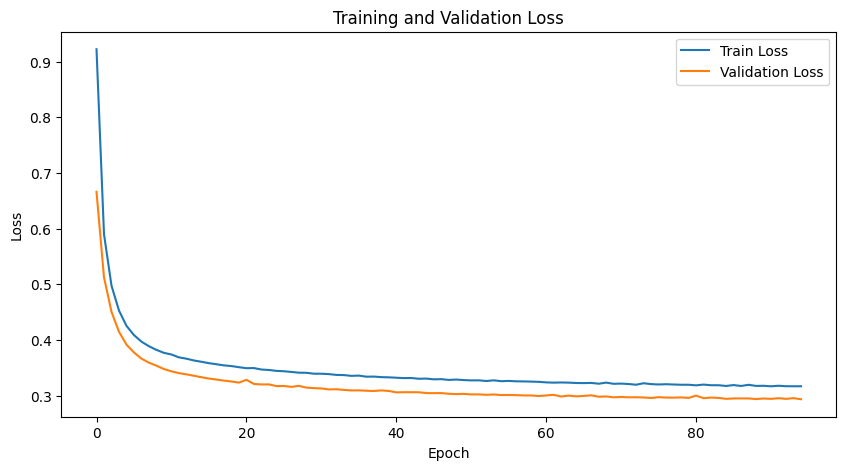


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      3900
           1       0.00      0.00      0.00       286
           2       0.99      0.87      0.93       776
           3       0.83      0.90      0.86       915

    accuracy                           0.89      5877
   macro avg       0.68      0.68      0.68      5877
weighted avg       0.85      0.89      0.87      5877



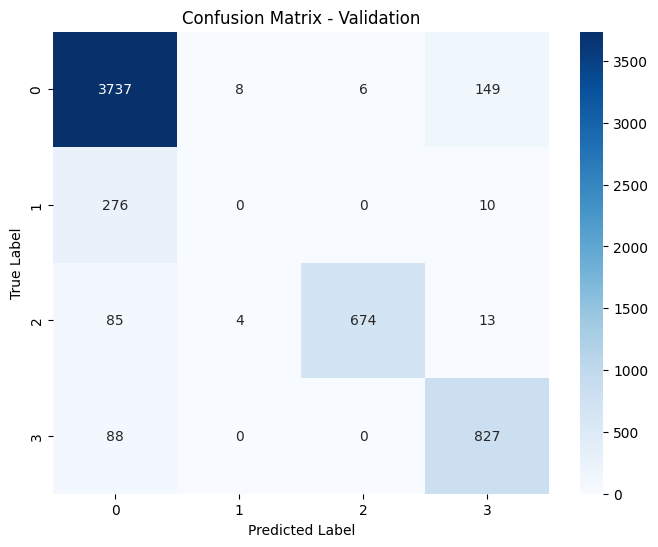

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      3827
           1       0.00      0.00      0.00       275
           2       0.99      0.88      0.93       800
           3       0.85      0.91      0.87       976

    accuracy                           0.89      5878
   macro avg       0.68      0.69      0.68      5878
weighted avg       0.86      0.89      0.87      5878



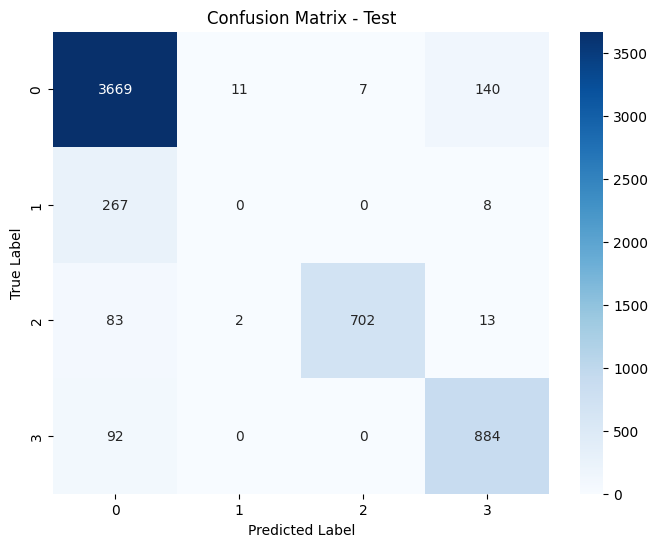

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2267 seconds to execute.
The function took 0.0781 seconds to execute.
The function took 0.0682 seconds to execute.
Train Accuracy: 88.6960
Validation Accuracy: 89.1271
Test Accuracy: 89.4012

Training model with 64 neurons (Linear activation)
The device is set to: cuda
Epoch 20/100, Train Loss: 0.3438, Val Loss: 0.3160
Epoch 40/100, Train Loss: 0.3283, Val Loss: 0.3028
Epoch 60/100, Train Loss: 0.3196, Val Loss: 0.2987
Early stopping at epoch 64 (best val loss: 0.296347)
The function took 33.9254 seconds to execute.


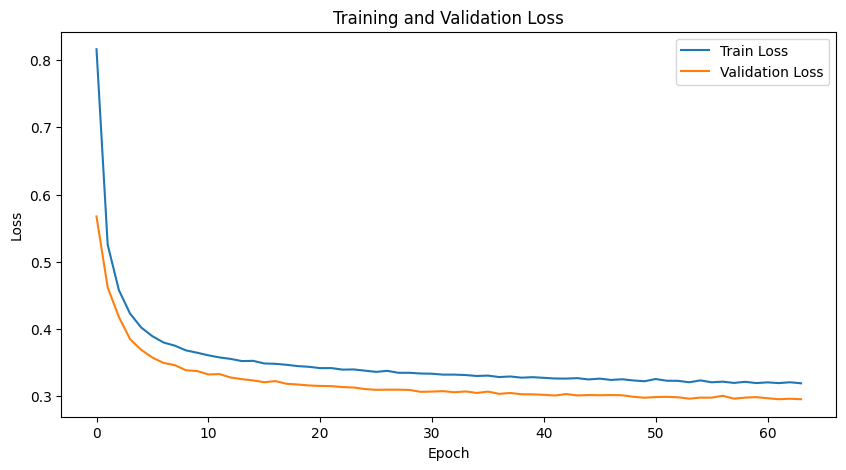


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      3900
           1       0.00      0.00      0.00       286
           2       0.99      0.86      0.92       776
           3       0.83      0.89      0.86       915

    accuracy                           0.89      5877
   macro avg       0.68      0.68      0.68      5877
weighted avg       0.85      0.89      0.87      5877



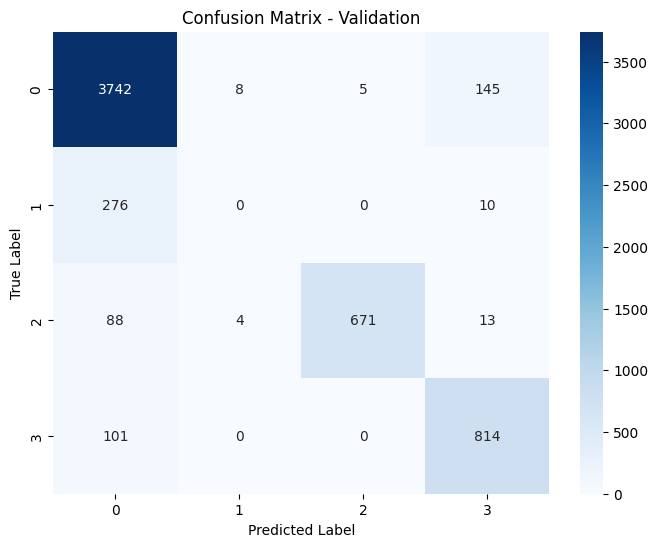

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      3827
           1       0.00      0.00      0.00       275
           2       0.99      0.88      0.93       800
           3       0.84      0.89      0.87       976

    accuracy                           0.89      5878
   macro avg       0.68      0.68      0.68      5878
weighted avg       0.85      0.89      0.87      5878



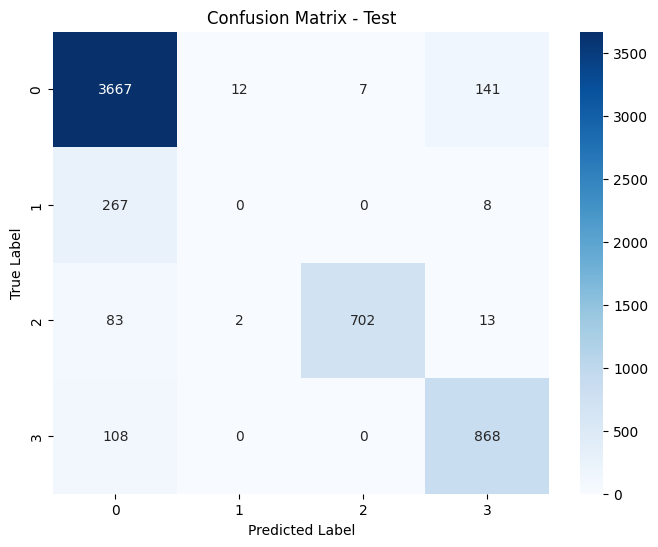

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2832 seconds to execute.
The function took 0.1077 seconds to execute.
The function took 0.0991 seconds to execute.
Train Accuracy: 88.5202
Validation Accuracy: 88.9399
Test Accuracy: 89.0949

Training model with 128 neurons (Linear activation)
The device is set to: cuda
Epoch 20/100, Train Loss: 0.3395, Val Loss: 0.3119
Epoch 40/100, Train Loss: 0.3233, Val Loss: 0.2988
Epoch 60/100, Train Loss: 0.3198, Val Loss: 0.2938
Epoch 80/100, Train Loss: 0.3160, Val Loss: 0.2928
Early stopping at epoch 82 (best val loss: 0.290432)
The function took 41.7122 seconds to execute.


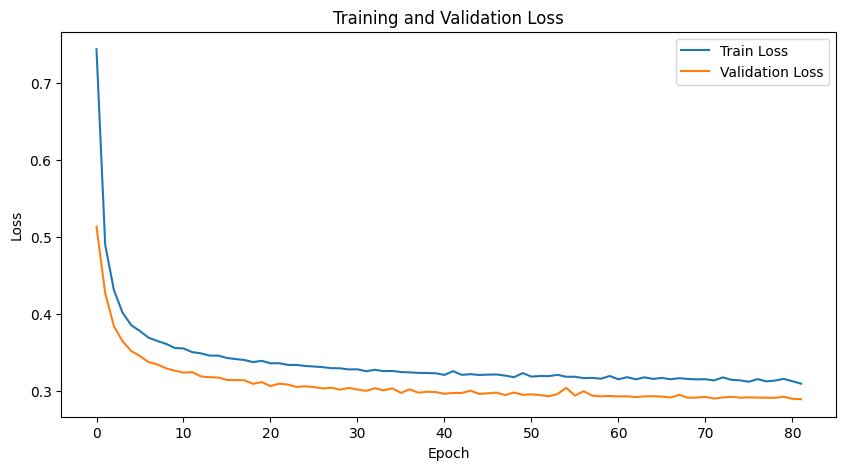


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3900
           1       0.00      0.00      0.00       286
           2       0.99      0.87      0.93       776
           3       0.82      0.91      0.86       915

    accuracy                           0.89      5877
   macro avg       0.68      0.68      0.68      5877
weighted avg       0.85      0.89      0.87      5877



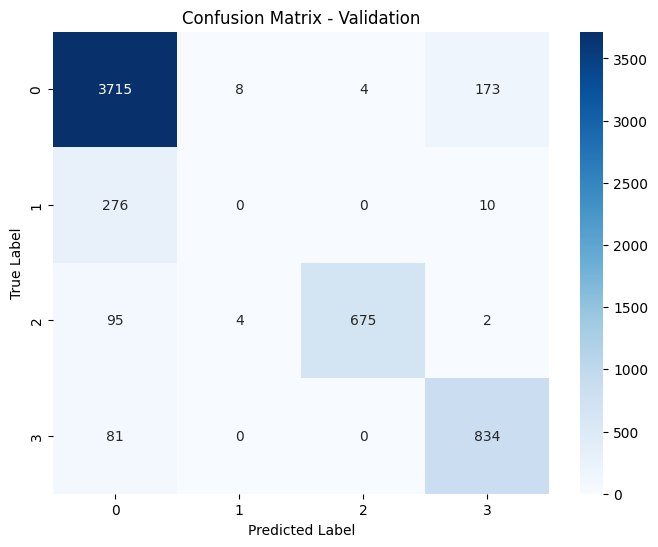

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3827
           1       0.00      0.00      0.00       275
           2       0.99      0.88      0.93       800
           3       0.84      0.91      0.87       976

    accuracy                           0.89      5878
   macro avg       0.68      0.69      0.68      5878
weighted avg       0.85      0.89      0.87      5878



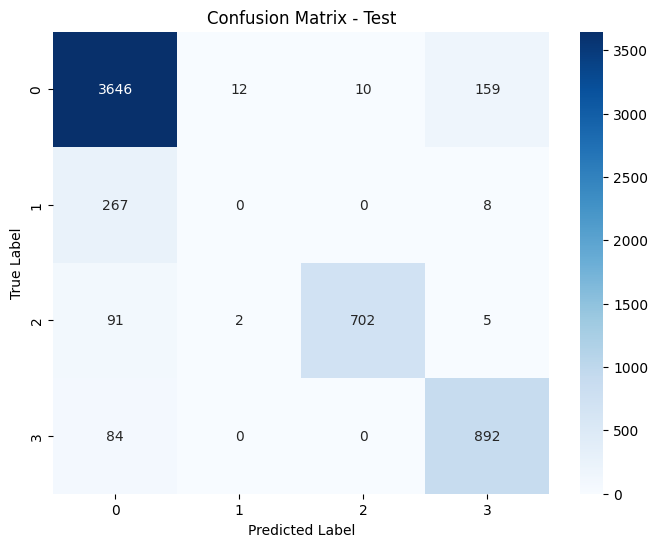

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2237 seconds to execute.
The function took 0.0701 seconds to execute.
The function took 0.0736 seconds to execute.
Train Accuracy: 88.3784
Validation Accuracy: 88.8889
Test Accuracy: 89.1460


In [ ]:
class ShallowNN(nn.Module):
  def __init__(self, input_size, hidden_units):
        super(ShallowNN, self).__init__()
        self.hidden_layer = nn.Linear(in_features=input_size, out_features=hidden_units) #this line is to set number of neurons
        self.output_layer = nn.Linear(in_features=hidden_units,out_features=4)

  def forward(self, x):
      x = self.hidden_layer(x)
      return self.output_layer(x)

def training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion,min_delta = None, patience = None):
    start_time = time.time()
    num_epochs = 100

    train_losses = []
    val_losses = []

    best_val_loss = float('inf')
    trigger_times = 0     # how many epochs since last improvement
    best_model_state = None
    # Training loop
    for epoch in range(num_epochs):  # Train for epochs
        train_loss = 0
        val_loss = 0
        model.train()  # Set model to training mode
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # Move batch to GPU
            optimizer.zero_grad()  # Clear previous gradients
            outputs = model(batch_X)  # Forward pass
            loss = criterion(outputs, batch_y)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update model parameters
            train_loss += loss.item() * batch_X.size(0)
        train_loss /= len(train_dataset)
        train_losses.append(train_loss)  # Store training loss

        # Compute Validation loss during training
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():  # Disable gradient computation for validation
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # Move batch to GPU
                val_outputs = model(batch_X)  # Forward pass
                loss = criterion(val_outputs, batch_y)  # Compute validation loss
                val_loss += loss.item() * batch_X.size(0)
            val_loss /= len(val_dataset)
            val_losses.append(val_loss)  # Store validation loss
        if (epoch + 1) % 20 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')

        # ---- Early Stopping ----
        if(min_delta!= None):
            if val_loss < best_val_loss - min_delta:
                best_val_loss = val_loss
                best_model_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
                trigger_times = 0
            else:
                trigger_times += 1
                if trigger_times >= patience:
                    print(f"Early stopping at epoch {epoch+1} (best val loss: {best_val_loss:.6f})")
                    break

    # ---- Restore best model ----
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    print(f'The function took {elapsed_time:.4f} seconds to execute.')
    # Plot the training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    file_name = f'/content/training_{neurons}_neurons.png'
    #plt.savefig(file_name) #step 1 to download
    plt.show()
    #files.download(file_name)#step 2 download as file

#testing function
def testing_model(model, dataloader, device):
    """
    Evaluate the model on a given dataloader and compute accuracy.

    Args:
        model: The trained model.
        dataloader: DataLoader for the dataset.
        device: Device to run the model on (CPU or GPU).

    Returns:
        float: Accuracy of the model on the test dataset.
    """
    # Record the start time
    start_time = time.time()

    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_predictions = []

    with torch.no_grad():  # Disable gradient computation for efficiency
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move batch to GPU
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # Get the class with highest score
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions) * 100

    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    print(f'The function took {elapsed_time:.4f} seconds to execute.')

    return accuracy

#function to show the classification report per class per model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def evaluate_model(model, dataloader, device, dataset_name=""):
    """
    Evaluate the model and return accuracy, classification report, and predictions.
    """
    model.eval()
    all_labels = []
    all_predictions = []
    all_probabilities = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probabilities = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions) * 100
    report = classification_report(all_labels, all_predictions, output_dict=True)

    print(f"\n{dataset_name} Classification Report:")
    print(classification_report(all_labels, all_predictions))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(all_labels, all_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    file_name = f'/content/confusion_{neurons}_neurons_{dataset_name}.png'
    plt.savefig(file_name) #step 1 to download
    plt.show()
    files.download(file_name)#step 2 download as file

    return accuracy, report, all_predictions, all_probabilities


#three models
neurons_list = [32, 64, 128]


for neurons in neurons_list:
    print(f"\n{'='*50}")
    print(f"Training model with {neurons} neurons (Linear activation)")
    print(f"{'='*50}")

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"The device is set to: {device}")
    model = ShallowNN(16,neurons)
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)
    training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion,min_delta=0.001, patience=10)

    #report on classification report per model
    val_accuracy, val_report, _, _ = evaluate_model(model, val_loader, device, "Validation")
    test_accuracy, test_report, _, _ = evaluate_model(model, test_loader, device, "Test")

    #testing
    train_accuracy = testing_model(model,train_loader,device)
    val_accuracy = testing_model(model,val_loader,device)
    test_accuracy = testing_model(model,test_loader,device)

    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')




Issue: test score on feature 1 is 0, the model does not learn feat 1 !

Also we can see that class 1 is the least represented in the validation set (maybe also in the whole dataset), respectively: 3900, 286, 776, 915

Maybe this is why feature 1 is "hard" to learn.


#### Questions:
Q: Plot the loss curves during training on the training and validation set of the three models. What is their evolution? Do they converge?

A: With each one of the models, the loss curves converge around epoch 50 to a loss value of about 0.29


Q: How do you select the best model across epochs?

A:


Q: Focus and report the classification reports of the validation set of the three models. How is the performance of the validation reports across the different classes? Is the performance good or poor? Why?

A: The performance changes for the different classes, each model struggles with feature 1, that is also the least represented class. The other classes offer instead a good performance, with high values in precision and recall.


Q: Now, focus on the best model you chose. Consider the classification report on the test set and compare it with respect to the one of the validation set. Is the performance similar? I.e., does the model generalize?

A: We consider the model with 64 neurons the best one, as it has very similar results with respect to the one with 128 neurons and, having less neurons, it is more efficient.The performance in validation and test is very similar, in fact we get Validation Accuracy: 88.9570 and Test Accuracy: 89.1630, with very similar values in precision and recall.


## With ReLu function

Here rather than defining a third `ShallowNN` class, we should just modify the class above to set relu, modify the forward method and then run the test with the 3 parameters


Training model with 64 neurons (ReLu)
The device is set to: cuda
Epoch 20/100, Train Loss: 0.1728, Val Loss: 0.1504
Epoch 40/100, Train Loss: 0.1489, Val Loss: 0.1335
Epoch 60/100, Train Loss: 0.1365, Val Loss: 0.1253
Epoch 80/100, Train Loss: 0.1296, Val Loss: 0.1193
Epoch 100/100, Train Loss: 0.1243, Val Loss: 0.1163
The function took 55.1933 seconds to execute.


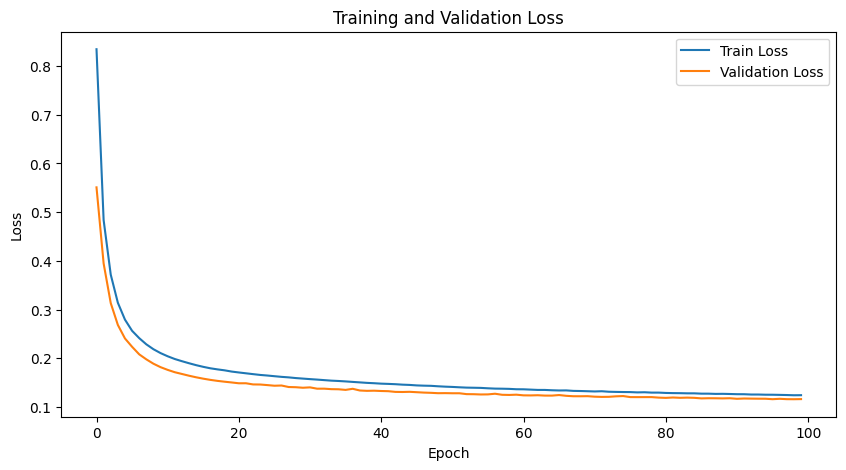

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3900
           1       0.82      0.95      0.88       286
           2       1.00      0.90      0.95       776
           3       0.96      0.92      0.94       915

    accuracy                           0.96      5877
   macro avg       0.94      0.94      0.94      5877
weighted avg       0.96      0.96      0.96      5877



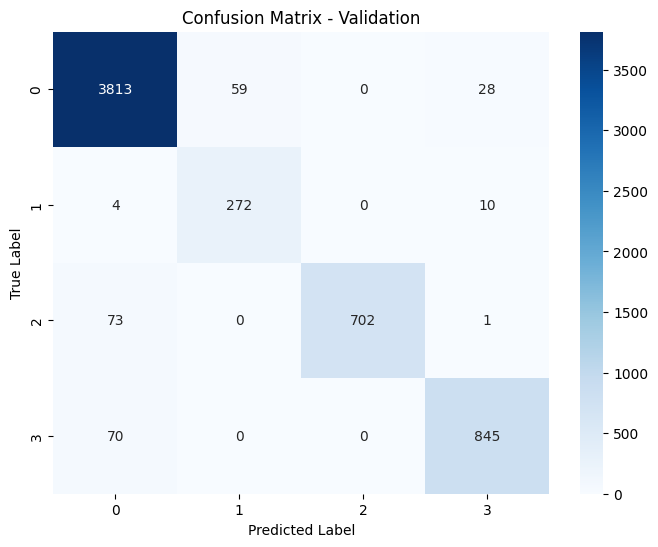

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3827
           1       0.80      0.97      0.88       275
           2       1.00      0.91      0.95       800
           3       0.96      0.92      0.94       976

    accuracy                           0.96      5878
   macro avg       0.93      0.94      0.93      5878
weighted avg       0.96      0.96      0.96      5878



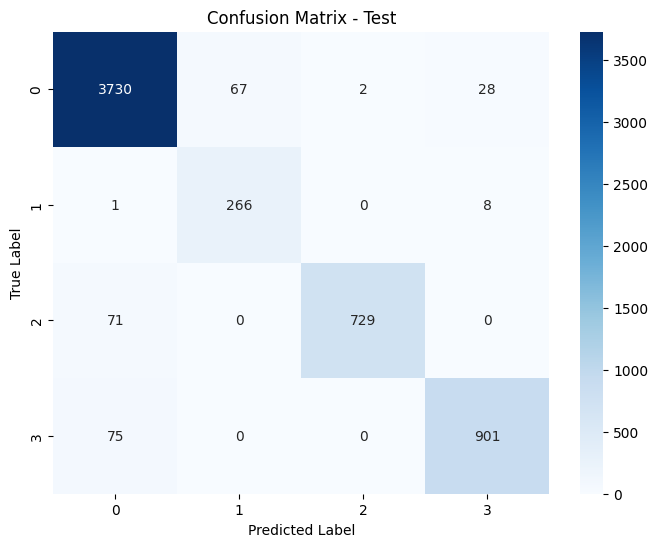

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2477 seconds to execute.
The function took 0.0749 seconds to execute.
The function took 0.0716 seconds to execute.
Train Accuracy: 95.1166
Validation Accuracy: 95.8312
Test Accuracy: 95.7128


In [ ]:
ShallowNN.relu = nn.ReLU()

# New forward function for the ShallowNN class
def new_forward(self, x):
  x = self.hidden_layer(x)
  x = self.relu(x)  # Apply ReLU
  return self.output_layer(x)

ShallowNN.forward = new_forward


# The best model
neurons_list = [64]

for neurons in neurons_list:
    print(f"\n{'='*50}")
    print(f"Training model with {neurons} neurons (ReLu)")
    print(f"{'='*50}")

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"The device is set to: {device}")
    model = ShallowNN(16,neurons)
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)
    training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion,min_delta=0.001, patience=10)

    #report on classification report per model
    val_accuracy, val_report, _, _ = evaluate_model(model, val_loader, device, "Validation")
    test_accuracy, test_report, _, _ = evaluate_model(model, test_loader, device, "Test")

    #testing
    train_accuracy = testing_model(model,train_loader,device)
    val_accuracy = testing_model(model,val_loader,device)
    test_accuracy = testing_model(model,test_loader,device)

    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')


Now we learn feature 1.

Questions:
Q: Focus and report the classification report of the validation set. Does the model perform better in a specific class?

A: Yes, now class 1 is finally learned by the model


Q: Would it be correct to compare the results on the test set?

A:

# Task 3: The impact of Specific Features

mask size: 275

Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      3827
           1       0.16      0.05      0.07       275
           2       1.00      0.91      0.95       800
           3       0.96      0.92      0.94       976

    accuracy                           0.91      5878
   macro avg       0.76      0.71      0.73      5878
weighted avg       0.89      0.91      0.90      5878



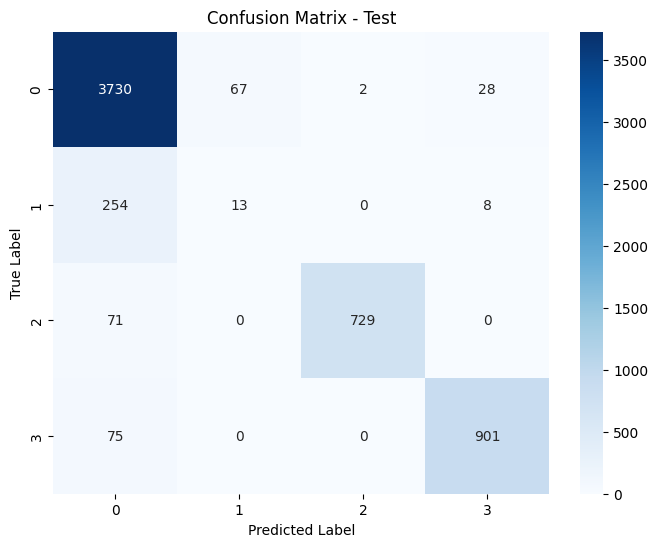

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.3547 seconds to execute.
Test Accuracy (with modified port): 91.4086


In [ ]:
# Change port 80 to 8080 in the test set in Brute force attacks, using a new tensor
brute_force_value = label_encoder.transform(['Brute Force'])[0] # Get the encoded value assigned to the label "Brute Force"

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_test_8080 = X_test.copy()


mask = (y_test == brute_force_value) & (X_test_8080[:, -1] == 80)
print(f"mask size: {mask.sum()}")

X_test_8080[mask, -1] = 8080
X_test_8080 = scaler.transform(X_test_8080)
X_test_tensor_8080 = torch.tensor(X_test_8080, dtype=torch.float32)

# Test on the modified dataset
test_dataset_8080 = TensorDataset(X_test_tensor_8080, y_test_tensor)
test_loader_8080 = DataLoader(test_dataset_8080, batch_size=64, shuffle=False)

test_accuracy, test_report, _, _ = evaluate_model(model, test_loader_8080, device, "Test")
test_accuracy_8080 = testing_model(model,test_loader_8080,device)


print(f'Test Accuracy (with modified port): {test_accuracy_8080:.4f}')

Now the classifier has a bad precision on class 1.

Remove Destination Port from the original dataset and repeat pre-processing

In [ ]:
df = pd.read_csv(f'/content/dataset_lab_1.csv')
pd.set_option('mode.use_inf_as_na', True)
df = df.dropna() #drop null values

portScanCount = (df['Label'] == 'PortScan').sum()
print(f'PortScan count before removing ports and duplicate rows: {portScanCount}')

df.drop('Destination Port', axis=1, inplace=True)
df = df.drop_duplicates() # Remove duplicates

portScanCount = (df['Label'] == 'PortScan').sum()
print(f'PortScan count after removing ports and duplicate rows: {portScanCount}')
bruteForceCount = (df['Label'] == 'Brute Force').sum()
DoSCount = (df['Label'] == 'DoS Hulk').sum()
benignCount = (df['Label'] == 'Benign').sum()

print(f'Brute Force count: {bruteForceCount}\nDoS Hulk count: {DoSCount}\nBenign count: {benignCount}')


# Repeat previous operations to have the new dataset

label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

X = df[df.columns[:-1]].values
y = df['Label'].values

#Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Standardize training and validation sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

PortScan count before removing ports and duplicate rows: 4999
PortScan count after removing ports and duplicate rows: 285
Brute Force count: 1427
DoS Hulk count: 3868
Benign count: 16889


/tmp/ipython-input-3426285492.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


#### Questions
Q: All Brute Force attacks in your dataset originate
from port 80: is this a reasonable assumption?

A: No, in fact if a new attack targets a different port, it may not be recognized by the model, that might learn that Brute Force can happen only on port 80


Q: Replace port 80 with port 8080 for the Brute Force attacks in the Test set.Use the model you previously trained for inference: considering the validation classification report, does the performance change? How does it change? Why?

A: The performance changes, in particular regarding class 1, the one related to Brute Force attacks. We can see a huge drop in the precision and recall values, that go respectively from 0.80 and 0.96 to 0.16 and 0.05. This can happen due to the assumption that all the brute force attacks in the dataset happened on port 80.

Q:  How many PortScan do you now have after preprocessing (e.g., removing duplicates)? How many did you have before?

A: PortScan count before removing ports and duplicate rows: 4999; PortScan count after removing ports and duplicate rows: 285


Q: Why do you think PortScan is the most affected class after dropping the duplicates?

A: Because a Port Scan attack is strictly connected to the destination port feature, as a scanner interacts with different destination ports to find, for example, some services that he can interact with.


Q: Are the classes now balanced?

A: No, we have in fact:
PortScan: 285
Brute Force count: 1427
DoS Hulk count: 3868
Benign count: 16889

# Task 4: The impact of the Loss Function

## Class 3 precision is bad
Repeat training on the updated dataset with 64 neurons and ReLu


Training model with 64 neurons (ReLu)
The device is set to: cuda
Epoch 20/100, Train Loss: 0.1664, Val Loss: 0.1714
Epoch 40/100, Train Loss: 0.1386, Val Loss: 0.1430
Epoch 60/100, Train Loss: 0.1271, Val Loss: 0.1323
Epoch 80/100, Train Loss: 0.1215, Val Loss: 0.1262
Epoch 100/100, Train Loss: 0.1172, Val Loss: 0.1218
The function took 42.4229 seconds to execute.


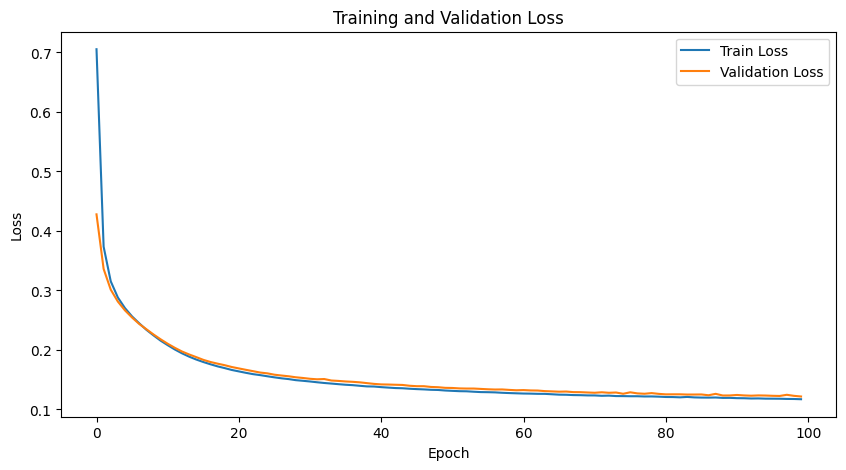

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3377
           1       0.81      0.93      0.86       273
           2       1.00      0.89      0.94       786
           3       0.45      0.31      0.37        58

    accuracy                           0.95      4494
   macro avg       0.80      0.78      0.79      4494
weighted avg       0.95      0.95      0.95      4494



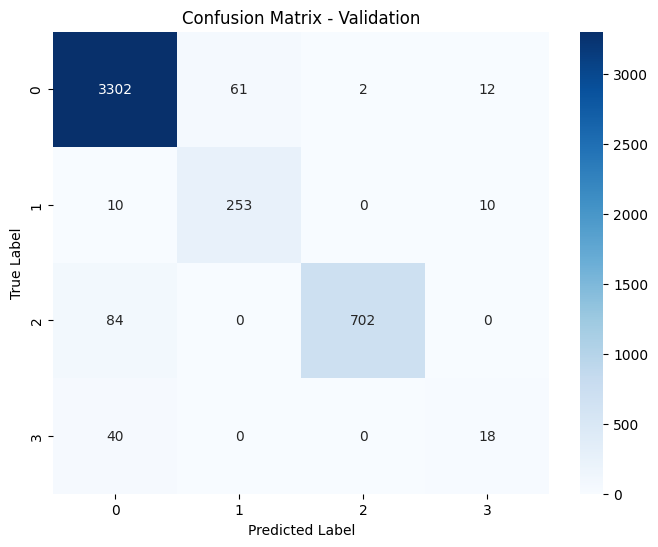

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3379
           1       0.78      0.96      0.86       299
           2       1.00      0.88      0.94       764
           3       0.50      0.27      0.35        52

    accuracy                           0.95      4494
   macro avg       0.81      0.77      0.78      4494
weighted avg       0.95      0.95      0.95      4494



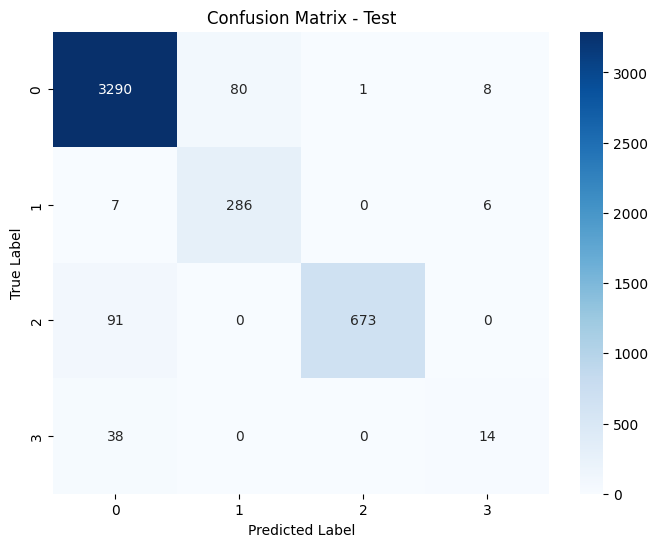

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.1888 seconds to execute.
The function took 0.0651 seconds to execute.
The function took 0.0556 seconds to execute.
Train Accuracy: 95.2229
Validation Accuracy: 95.1268
Test Accuracy: 94.8598


In [ ]:
neurons_list = [64]

for neurons in neurons_list:
    print(f"\n{'='*50}")
    print(f"Training model with {neurons} neurons (ReLu)")
    print(f"{'='*50}")

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"The device is set to: {device}")
    model = ShallowNN(15,neurons)
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)
    training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion,min_delta=0.001, patience=10)

    #report on classification report per model
    val_accuracy, val_report, _, _ = evaluate_model(model, val_loader, device, "Validation")
    test_accuracy, test_report, _, _ = evaluate_model(model, test_loader, device, "Test")

    #testing
    train_accuracy = testing_model(model,train_loader,device)
    val_accuracy = testing_model(model,val_loader,device)
    test_accuracy = testing_model(model,test_loader,device)

    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')

The least represented class is the number 3, precision is only 0.5, recall is bad.


## Introducing a weighted loss

Epoch 20/100, Train Loss: 0.2819, Val Loss: 0.3056
Epoch 40/100, Train Loss: 0.2300, Val Loss: 0.2606
Epoch 60/100, Train Loss: 0.2108, Val Loss: 0.2425
Epoch 80/100, Train Loss: 0.1986, Val Loss: 0.2325
Epoch 100/100, Train Loss: 0.1932, Val Loss: 0.2296
The function took 42.0370 seconds to execute.


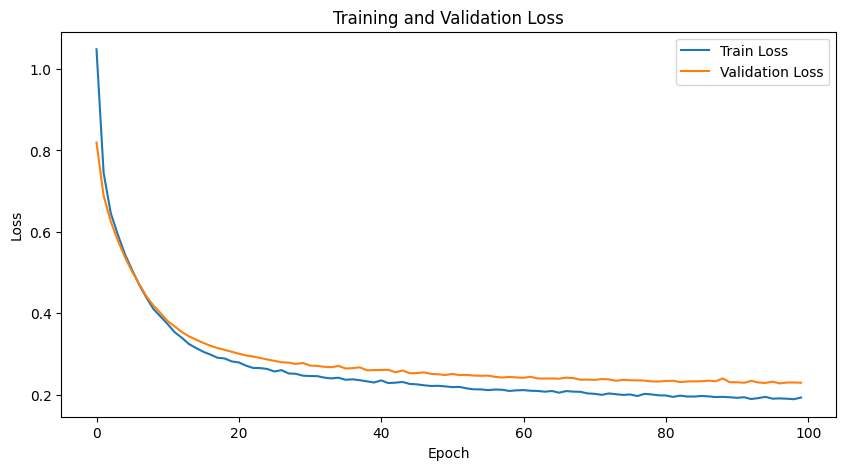

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3377
           1       0.77      0.93      0.84       273
           2       0.93      0.93      0.93       786
           3       0.28      0.97      0.43        58

    accuracy                           0.93      4494
   macro avg       0.74      0.94      0.79      4494
weighted avg       0.96      0.93      0.94      4494



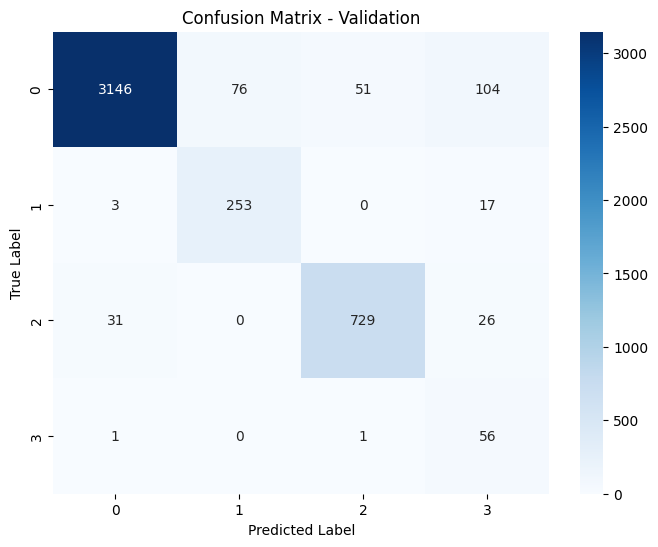

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3379
           1       0.75      0.96      0.85       299
           2       0.94      0.92      0.93       764
           3       0.22      0.94      0.36        52

    accuracy                           0.92      4494
   macro avg       0.73      0.94      0.77      4494
weighted avg       0.96      0.92      0.93      4494



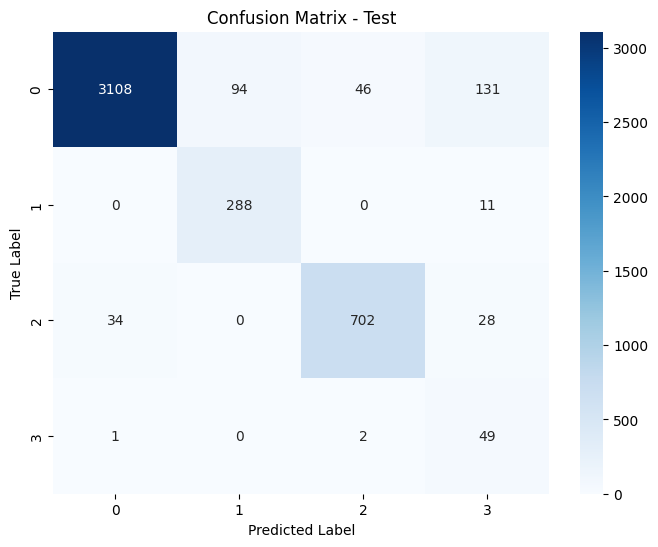

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.1719 seconds to execute.
The function took 0.0555 seconds to execute.
The function took 0.0556 seconds to execute.
Train Accuracy: 92.6044
Validation Accuracy: 93.1019
Test Accuracy: 92.2786


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
weights = torch.tensor(compute_class_weight(class_weight='balanced', classes=y_train_tensor.unique().numpy(), y=y_train_tensor.numpy()), dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=weights)

# Repeat training
model = ShallowNN(15,neurons)
model = model.to(device)
optimizer = optim.AdamW(model.parameters(), lr=0.0005)
training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion,min_delta=0.001, patience=10)

#report on classification report per model
val_accuracy, val_report, _, _ = evaluate_model(model, val_loader, device, "Validation")
test_accuracy, test_report, _, _ = evaluate_model(model, test_loader, device, "Test")


#testing
train_accuracy = testing_model(model,train_loader,device)
val_accuracy = testing_model(model,val_loader,device)
test_accuracy = testing_model(model,test_loader,device)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Precision is not that good, but recall is good (false positive), it means we have fake alert.


#### Question
Q:  How does the performance change? Can you still classify the rarest class?

A: The least represented class now is more difficult to be classified, in the test we can see this fact given the bad precision, 0.52, and recall, 0.44


Q: Which partition do you use to estimate the class weights?

A: We use only the training partition, as the test partition should remain completely unseen until tests are performed


Q: How does the performance change per class and overall? In particular, how does the accuracy change? How does the f1 score change?

A: Overall, after introducing a weighted loss, we have a small decrement in the accuracy in training, validation and test, that go from Train Accuracy: 95.0078, Validation Accuracy: 94.9266, Test Accuracy: 94.5705 to Train Accuracy: 93.0124, Validation Accuracy: 93.4802, Test Accuracy: 92.9684. Looking at the specific classes, instead, we have small changes in precision and recall values for the first three classes, while for class 3 we have a much higher recall, 0.90 in test and 0.97 in validation, with the precision remaining similar to the previous case. The f1 score remains almost equal in both experiments, except for class 3, where it becomes smaller.

#Task 5

## First deep NN

In [ ]:
######################    CANNOT RECCOGNIZE CLASS 3
# To recognize class 3 we should use weighted loss


class DeepNN(nn.Module):
    def __init__(self, input_size, hidden_units_list, use_batchnorm=False, use_dropout=False, dropout_prob=0.3):
        """
        Deep Neural Network with multiple hidden layers

        Args:
            input_size: Number of input features
            hidden_units_list: List of integers specifying neurons in each hidden layer
                              Example: [32, 16, 8] for 3 layers with 32, 16, 8 neurons
            use_batchnorm: Whether to include Batch Normalization layers
            use_dropout: Whether to include Dropout layers
            dropout_prob: Dropout probability
        """
        super(DeepNN, self).__init__()

        # Create hidden layers
        self.hidden_layers = nn.ModuleList()
        prev_units = input_size

        for i, hidden_units in enumerate(hidden_units_list):
            self.hidden_layers.append(nn.Linear(prev_units, hidden_units))
            if use_batchnorm:
                self.hidden_layers.append(nn.BatchNorm1d(hidden_units))
            self.hidden_layers.append(nn.ReLU())  # Apply ReLU after each linear or batchnorm layer
            if use_dropout:
                self.hidden_layers.append(nn.Dropout(dropout_prob))
            prev_units = hidden_units

        # Output layer
        self.output_layer = nn.Linear(prev_units, 4)


    def forward(self, x):

        for layer in self.hidden_layers:
            x = layer(x)

        # Final output layer
        x = self.output_layer(x)
        return x


#changed 100 to 50 epochs

def training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion, num_epochs=50, min_delta = None, patience = None):
    start_time = time.time()

    train_losses = []
    val_losses = []

    best_val_loss = float('inf')
    trigger_times = 0     # how many epochs since last improvement
    best_model_state = None
    # Training loop
    for epoch in range(num_epochs):  # Train for epochs
        train_loss = 0
        val_loss = 0
        model.train()  # Set model to training mode
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # Move batch to GPU
            optimizer.zero_grad()  # Clear previous gradients
            outputs = model(batch_X)  # Forward pass
            loss = criterion(outputs, batch_y)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update model parameters
            train_loss += loss.item() * batch_X.size(0)
        train_loss /= len(train_dataset)
        train_losses.append(train_loss)  # Store training loss

        # Compute Validation loss during training
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():  # Disable gradient computation for validation
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # Move batch to GPU
                val_outputs = model(batch_X)  # Forward pass
                loss = criterion(val_outputs, batch_y)  # Compute validation loss
                val_loss += loss.item() * batch_X.size(0)
            val_loss /= len(val_dataset)
            val_losses.append(val_loss)  # Store validation loss
        if (epoch + 1) % 20 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')

        # ---- Early Stopping ----
        if(min_delta!= None):
            if val_loss < best_val_loss - min_delta:
                best_val_loss = val_loss
                best_model_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
                trigger_times = 0
            else:
                trigger_times += 1
                if trigger_times >= patience:
                    print(f"Early stopping at epoch {epoch+1} (best val loss: {best_val_loss:.6f})")
                    break

    # ---- Restore best model ----
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    print(f'The function took {elapsed_time:.4f} seconds to execute.')
    # Plot the training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    timestamp = time.strftime('%Y%m%d_%H%M%S')
    file_name = f'/content/training_{timestamp}.png'
    plt.savefig(file_name) #step 1 to download
    plt.show()
    files.download(file_name)#step 2 download as file



The device is set to: cuda

Training model: arch_1
Architecture: 3 layers with [2, 2, 2] neurons
Epoch 20/50, Train Loss: 1.3819, Val Loss: 1.3773
Early stopping at epoch 21 (best val loss: 1.377388)
The function took 10.5619 seconds to execute.


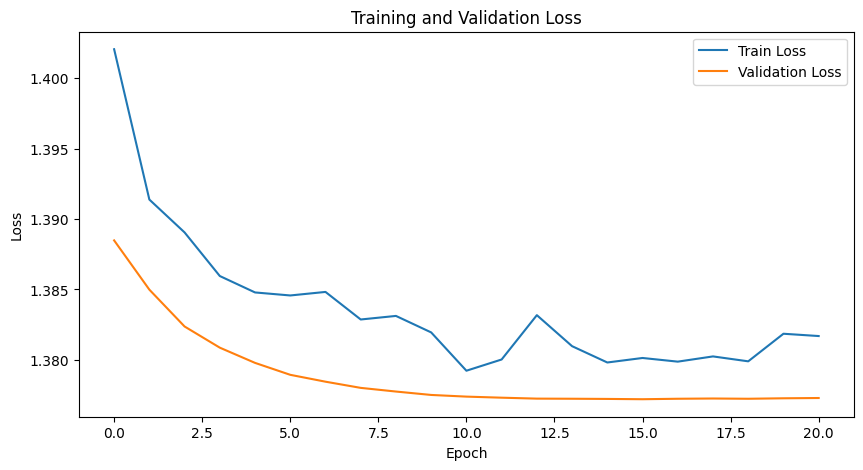

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - arch_1

Validation - arch_1 Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      3377
           1       0.00      0.00      0.00       273
           2       0.00      0.00      0.00       786
           3       0.00      0.00      0.00        58

    accuracy                           0.75      4494
   macro avg       0.19      0.25      0.21      4494
weighted avg       0.56      0.75      0.64      4494



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

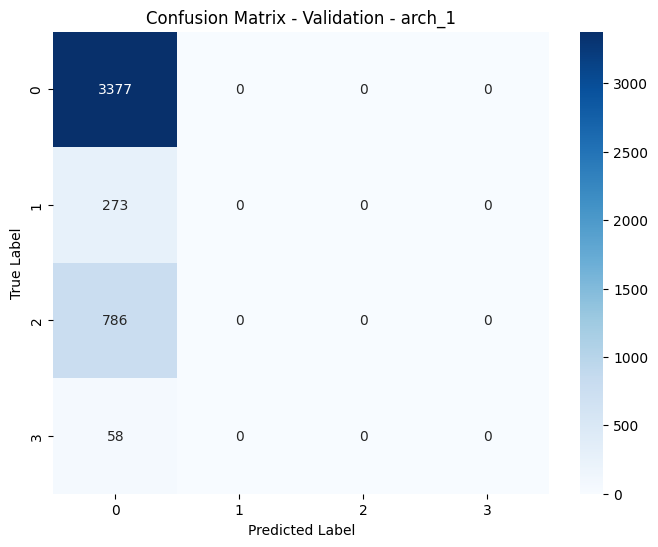

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


Test - arch_1 Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      3379
           1       0.00      0.00      0.00       299
           2       0.00      0.00      0.00       764
           3       0.00      0.00      0.00        52

    accuracy                           0.75      4494
   macro avg       0.19      0.25      0.21      4494
weighted avg       0.57      0.75      0.65      4494



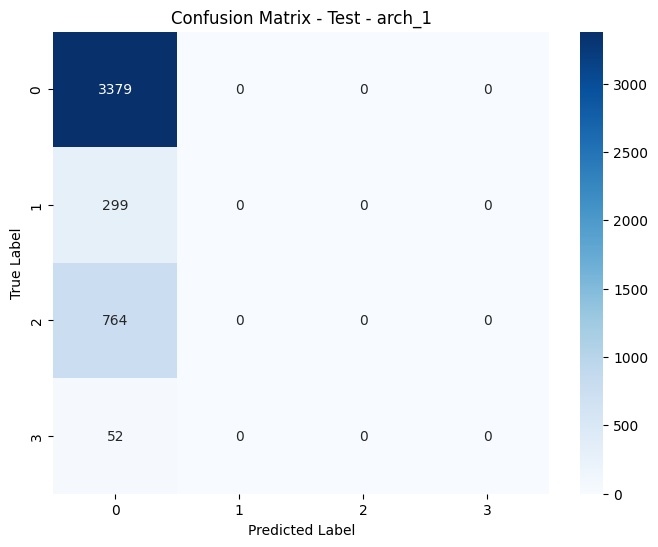

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2010 seconds to execute.
The function took 0.0630 seconds to execute.
The function took 0.0637 seconds to execute.

SUMMARY - arch_1:
Train Accuracy: 75.1650%
Validation Accuracy: 75.1446%
Test Accuracy: 75.1891%

Training model: arch_2
Architecture: 3 layers with [4, 16, 8] neurons
Epoch 20/50, Train Loss: 0.4875, Val Loss: 0.4735
Epoch 40/50, Train Loss: 0.3538, Val Loss: 0.3611
The function took 28.9384 seconds to execute.


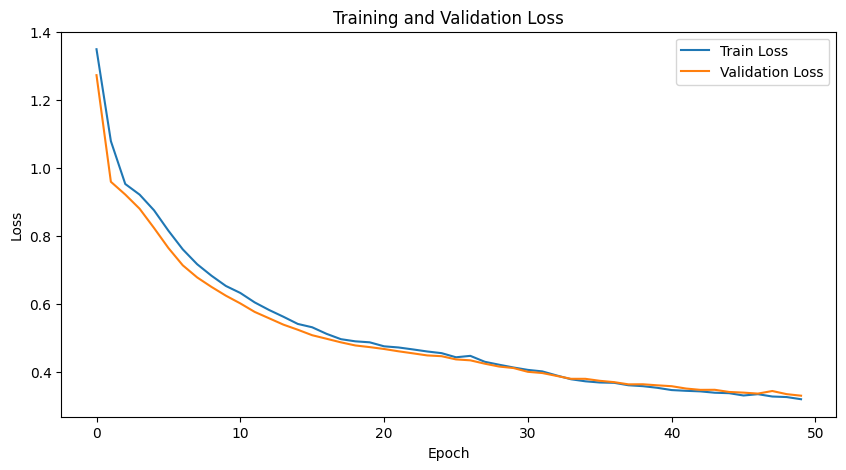

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - arch_2

Validation - arch_2 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      3377
           1       0.73      0.92      0.82       273
           2       0.97      0.87      0.92       786
           3       0.13      0.98      0.23        58

    accuracy                           0.88      4494
   macro avg       0.71      0.91      0.72      4494
weighted avg       0.96      0.88      0.91      4494



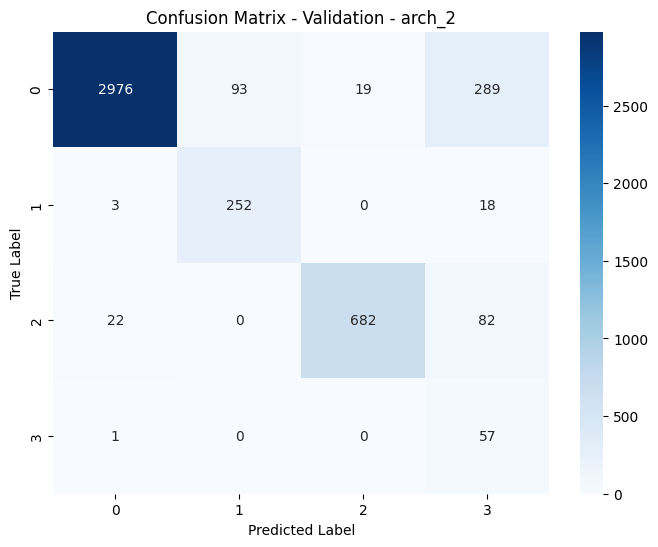

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Test - arch_2 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      3379
           1       0.72      0.96      0.83       299
           2       0.97      0.85      0.91       764
           3       0.12      0.98      0.21        52

    accuracy                           0.88      4494
   macro avg       0.70      0.92      0.72      4494
weighted avg       0.96      0.88      0.91      4494



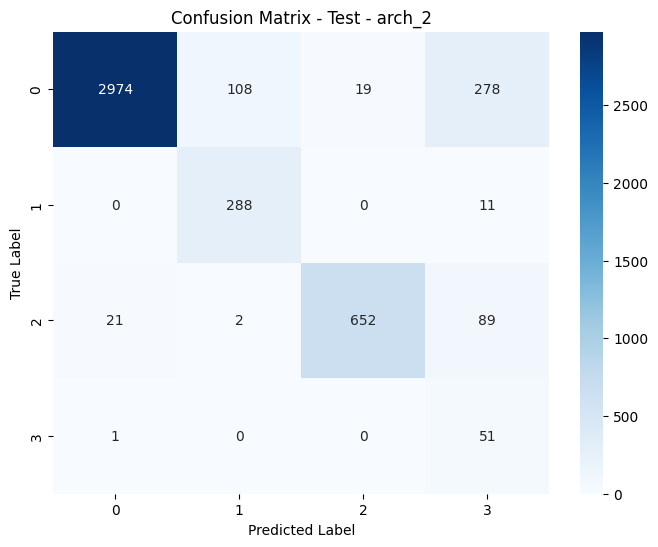

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.1941 seconds to execute.
The function took 0.0712 seconds to execute.
The function took 0.0622 seconds to execute.

SUMMARY - arch_2:
Train Accuracy: 87.9312%
Validation Accuracy: 88.2733%
Test Accuracy: 88.2287%

Training model: arch_3
Architecture: 4 layers with [16, 16, 8, 4] neurons
Epoch 20/50, Train Loss: 0.3584, Val Loss: 0.4065
Epoch 40/50, Train Loss: 0.2587, Val Loss: 0.3039
The function took 27.1445 seconds to execute.


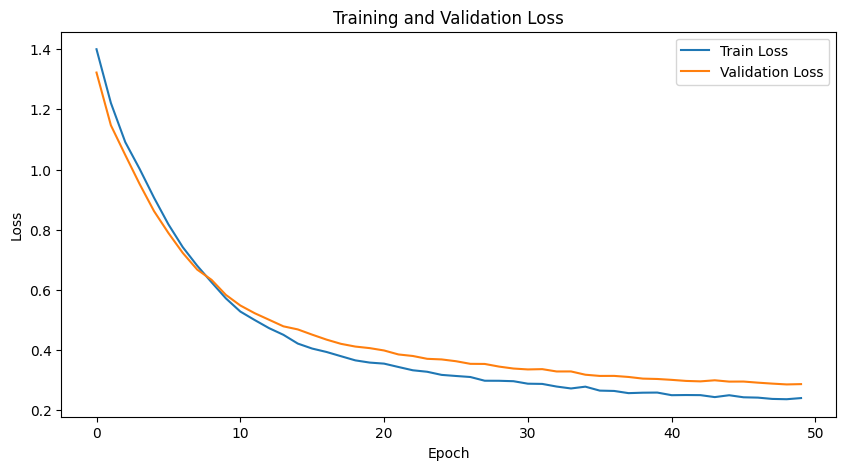

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - arch_3

Validation - arch_3 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3377
           1       0.73      0.93      0.82       273
           2       0.84      0.96      0.89       786
           3       0.42      0.91      0.57        58

    accuracy                           0.92      4494
   macro avg       0.74      0.93      0.81      4494
weighted avg       0.94      0.92      0.93      4494



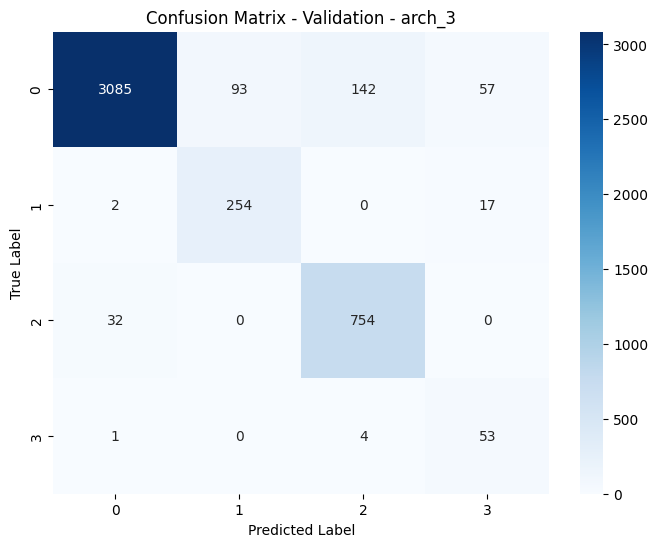

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Test - arch_3 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3379
           1       0.72      0.96      0.83       299
           2       0.84      0.96      0.89       764
           3       0.35      0.87      0.49        52

    accuracy                           0.92      4494
   macro avg       0.72      0.92      0.79      4494
weighted avg       0.94      0.92      0.92      4494



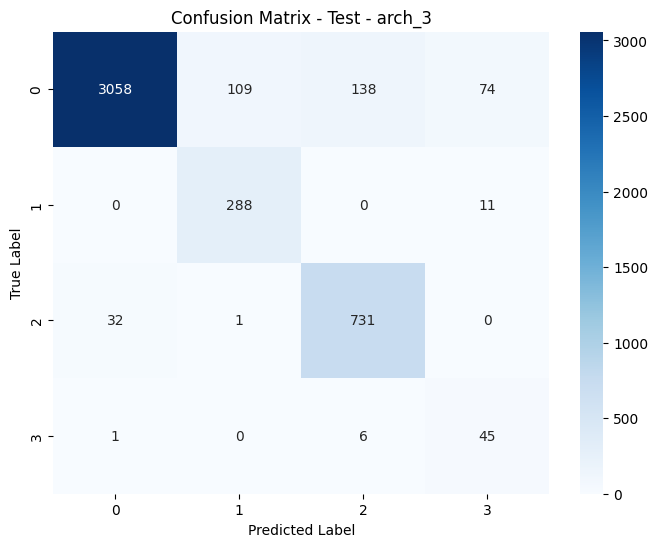

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.1940 seconds to execute.
The function took 0.0641 seconds to execute.
The function took 0.0681 seconds to execute.

SUMMARY - arch_3:
Train Accuracy: 91.8404%
Validation Accuracy: 92.2563%
Test Accuracy: 91.7223%

Training model: arch_4
Architecture: 4 layers with [4, 4, 16, 8] neurons
Epoch 20/50, Train Loss: 0.6053, Val Loss: 0.5990
Epoch 40/50, Train Loss: 0.5444, Val Loss: 0.5503
The function took 27.3967 seconds to execute.


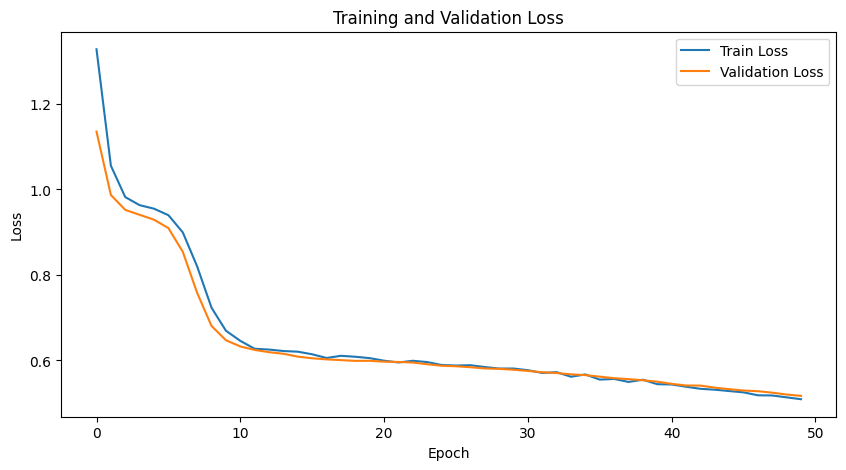

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - arch_4

Validation - arch_4 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79      3377
           1       0.70      0.93      0.80       273
           2       0.98      0.87      0.92       786
           3       0.04      0.86      0.09        58

    accuracy                           0.72      4494
   macro avg       0.67      0.83      0.65      4494
weighted avg       0.95      0.72      0.81      4494



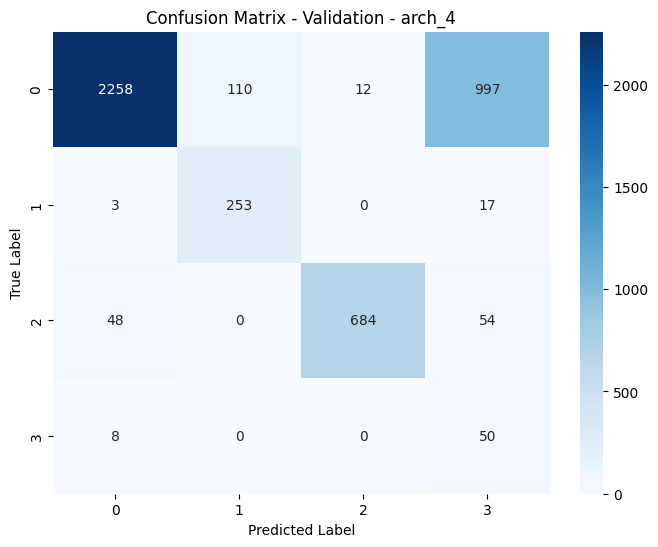

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Test - arch_4 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.65      0.78      3379
           1       0.68      0.96      0.80       299
           2       0.98      0.85      0.91       764
           3       0.04      0.90      0.08        52

    accuracy                           0.71      4494
   macro avg       0.67      0.84      0.64      4494
weighted avg       0.94      0.71      0.80      4494



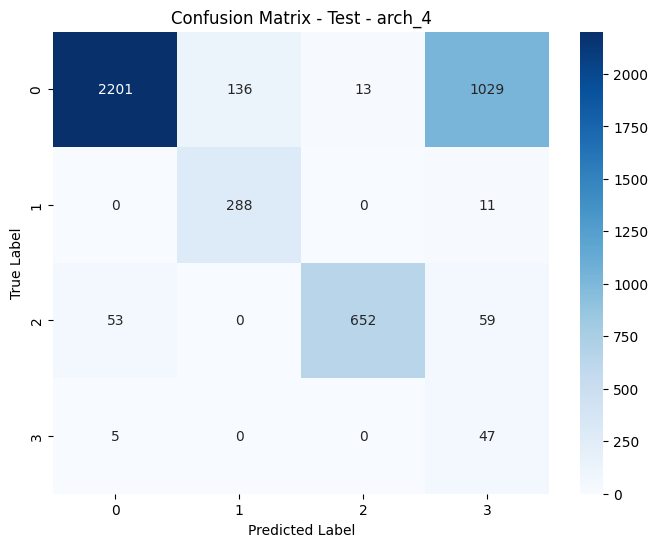

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2103 seconds to execute.
The function took 0.0648 seconds to execute.
The function took 0.0660 seconds to execute.

SUMMARY - arch_4:
Train Accuracy: 71.7232%
Validation Accuracy: 72.2074%
Test Accuracy: 70.9390%

Training model: arch_5
Architecture: 5 layers with [16, 16, 8, 8, 4] neurons
Epoch 20/50, Train Loss: 0.2846, Val Loss: 0.3458
Epoch 40/50, Train Loss: 0.2334, Val Loss: 0.2938
The function took 29.6342 seconds to execute.


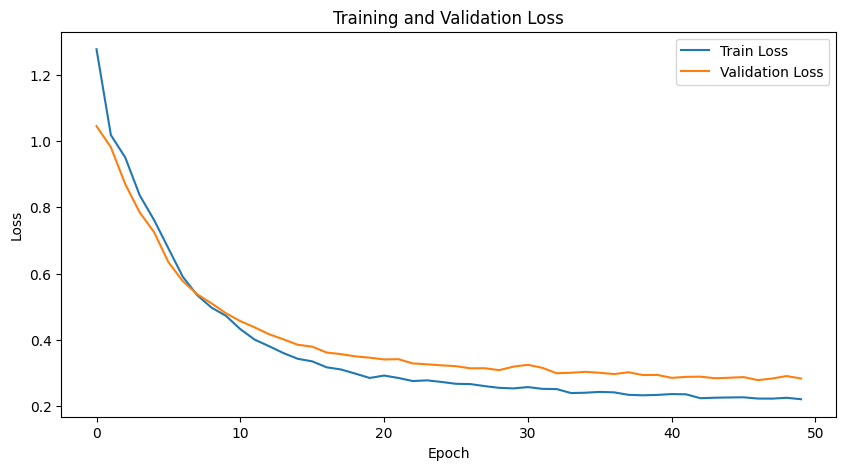

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - arch_5

Validation - arch_5 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3377
           1       0.75      0.93      0.83       273
           2       0.94      0.88      0.91       786
           3       0.18      0.97      0.30        58

    accuracy                           0.91      4494
   macro avg       0.71      0.92      0.75      4494
weighted avg       0.96      0.91      0.93      4494



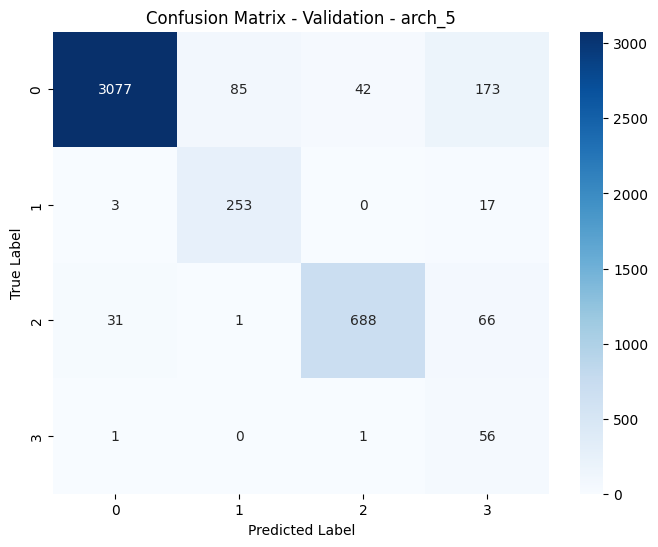

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Test - arch_5 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3379
           1       0.74      0.96      0.84       299
           2       0.93      0.87      0.90       764
           3       0.16      0.98      0.27        52

    accuracy                           0.90      4494
   macro avg       0.71      0.93      0.74      4494
weighted avg       0.95      0.90      0.92      4494



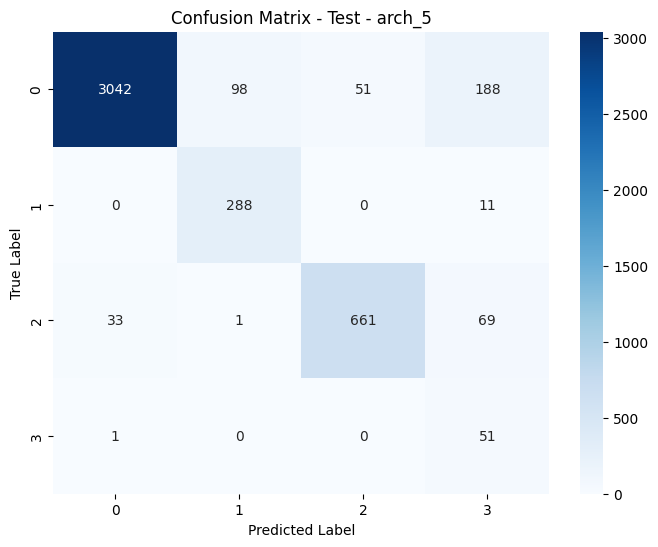

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2103 seconds to execute.
The function took 0.0714 seconds to execute.
The function took 0.0755 seconds to execute.

SUMMARY - arch_5:
Train Accuracy: 90.2010%
Validation Accuracy: 90.6542%
Test Accuracy: 89.9421%

Training model: arch_6
Architecture: 5 layers with [4, 4, 16, 16, 8] neurons
Epoch 20/50, Train Loss: 0.4727, Val Loss: 0.5164
Epoch 40/50, Train Loss: 0.3595, Val Loss: 0.4183
The function took 29.2305 seconds to execute.


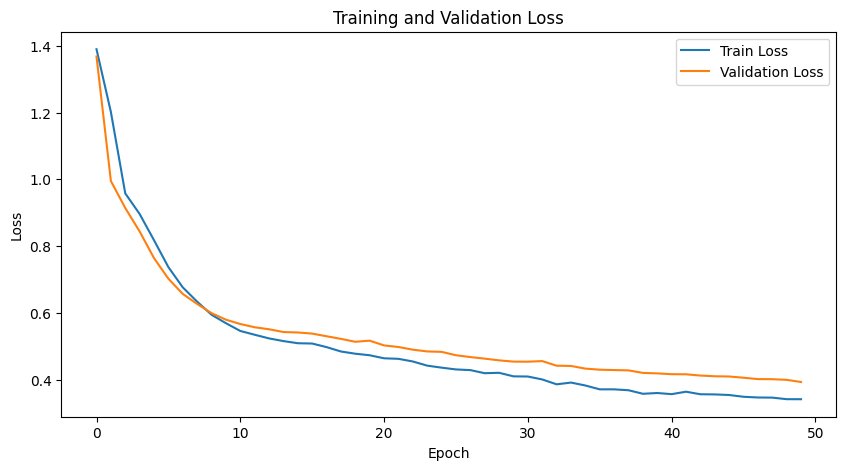

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - arch_6

Validation - arch_6 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      3377
           1       0.63      0.92      0.75       273
           2       0.98      0.87      0.92       786
           3       0.12      0.86      0.20        58

    accuracy                           0.87      4494
   macro avg       0.68      0.88      0.70      4494
weighted avg       0.96      0.87      0.91      4494



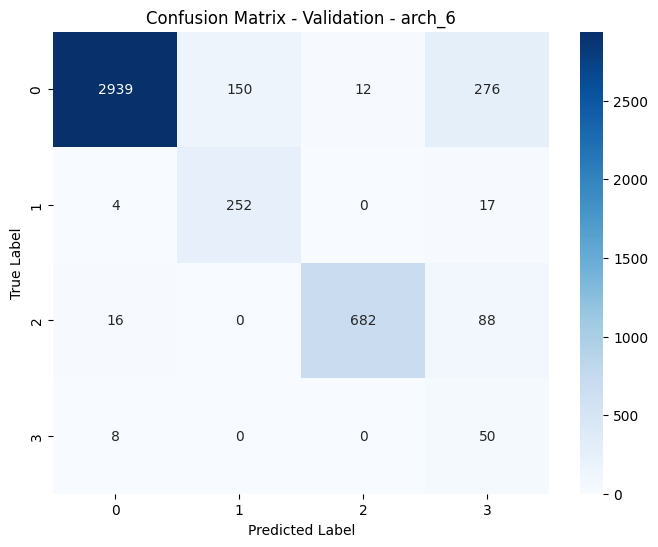

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Test - arch_6 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      3379
           1       0.65      0.96      0.78       299
           2       0.98      0.85      0.91       764
           3       0.11      0.96      0.19        52

    accuracy                           0.86      4494
   macro avg       0.68      0.91      0.70      4494
weighted avg       0.96      0.86      0.90      4494



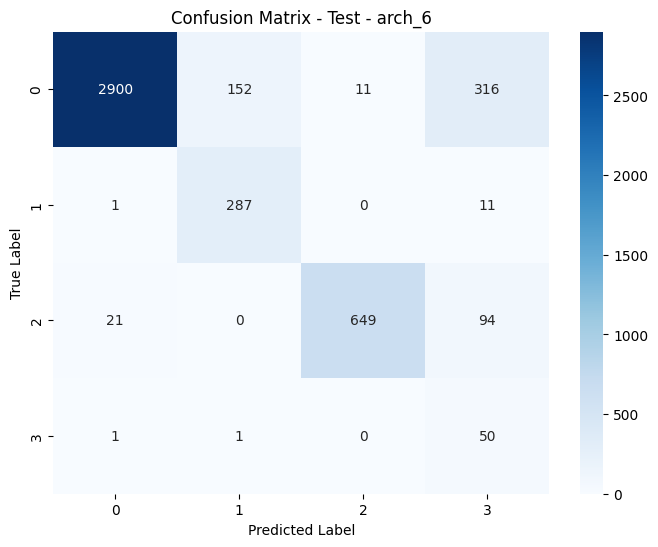

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2223 seconds to execute.
The function took 0.0697 seconds to execute.
The function took 0.0672 seconds to execute.

SUMMARY - arch_6:
Train Accuracy: 86.1954%
Validation Accuracy: 87.2942%
Test Accuracy: 86.4709%


In [ ]:
#call to the functions
# Define the 6 architectures
architectures = {
    # 3-layer architectures
    'arch_1': [2, 2, 2],
    'arch_2': [4, 16, 8],

    # 4-layer architectures
    'arch_3': [16, 16, 8, 4],
    'arch_4': [4, 4, 16, 8],

    # 5-layer architectures
    'arch_5': [16, 16, 8, 8, 4],
    'arch_6': [4, 4, 16, 16, 8]
}


# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"The device is set to: {device}")

# Train and evaluate all architectures
for arch_name, hidden_units in architectures.items():
    print(f"\n{'='*50}")
    print(f"Training model: {arch_name}")
    print(f"Architecture: {len(hidden_units)} layers with {hidden_units} neurons")
    print(f"{'='*50}")

    # Create model
    model = DeepNN(input_size=15, hidden_units_list=hidden_units)  # 15 features after removing port
    model = model.to(device)

    # Define loss and optimizer
    #criterion = nn.CrossEntropyLoss()
    #optimizer = optim.AdamW(model.parameters(), lr=0.0005)

    weights = torch.tensor(compute_class_weight(class_weight='balanced', classes=y_train_tensor.unique().numpy(), y=y_train_tensor.numpy()), dtype=torch.float).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)

    training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion,min_delta=0.001, patience=10)


    # Report on classification report per model (using your evaluate_model)
    print(f"\n{'='*40}")
    print(f"CLASSIFICATION REPORT - {arch_name}")
    print(f"{'='*40}")
    val_accuracy, val_report, _, _ = evaluate_model(model, val_loader, device, f"Validation - {arch_name}")
    _, test_report, _, _ = evaluate_model(model, test_loader, device, f"Test - {arch_name}")

    # Testing (using your testing_model for quick accuracy)
    train_accuracy = testing_model(model, train_loader, device)
    val_accuracy = testing_model(model, val_loader, device)
    test_accuracy = testing_model(model, test_loader, device)

    print(f'\nSUMMARY - {arch_name}:')
    print(f'Train Accuracy: {train_accuracy:.4f}%')
    print(f'Validation Accuracy: {val_accuracy:.4f}%')
    print(f'Test Accuracy: {test_accuracy:.4f}%')

- arch 3 seems decent
- arch 6 seems good

I executed different times the code, arch 3 seems to be the best as it was good every time, the other archs are less stable in my opinion. Also arch 5 was good but it goes from 90% accuracy in this run to 85% accuracy in some other runs


#### Question
For each number of layers, try 2 combinations of Neurons per layer (6 architectures in total):

Q: Plot and analyze the losses. Do the models converge?

A: Yes, all the models converge in both training and validation losses


Q: Calculate the performance in the validation set and identify the best-performing architecture. How do you select one?

A: The best-performing architecture is the third one, with 4 layers and [16, 16, 8, 4] neurons. We chose it by running the code different times (and so on different dataset splits) and by noticing that it was the most consistent architecture and often also the one with the best performances. It kept every time an accuracy of about 90-92% in training, validation and test and it was also very good in recognizing every class, even class 3 that is the rarest one.
(Should we include also more than one output for the architectures to show this fact?)


Q: Evaluate and report the performance of the best model in the test set.

A: Test arch_3 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      3379
           1       0.70      0.96      0.81       299
           2       0.79      0.96      0.86       764
           3       0.33      0.87      0.48        52

     accuracy                          0.90      4494
     macro avg     0.70      0.92      0.77      4494
     weighted avg  0.93      0.90      0.91      4494

## 5.2 Batch size


################################################################################
BATCH SIZE EXPERIMENT: 4
################################################################################
The device is set to: cuda

Training: arch_3 | Batch: 4
Epoch 20/50, Train Loss: 0.1844, Val Loss: 0.1998
Epoch 40/50, Train Loss: 0.1697, Val Loss: 0.1938
Early stopping at epoch 47 (best val loss: 0.182591)
The function took 323.6467 seconds to execute.


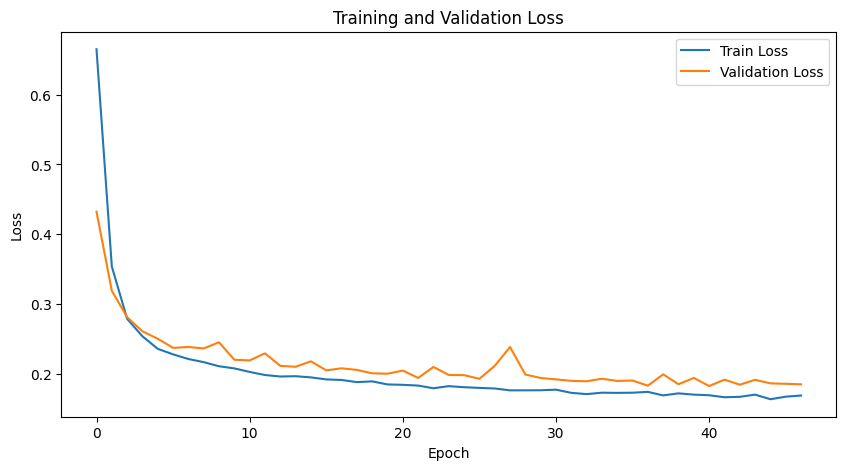

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Batch: 4

Validation - arch_3 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3377
           1       0.78      0.92      0.85       273
           2       0.93      0.95      0.94       786
           3       0.47      0.90      0.62        58

    accuracy                           0.95      4494
   macro avg       0.79      0.93      0.84      4494
weighted avg       0.96      0.95      0.95      4494



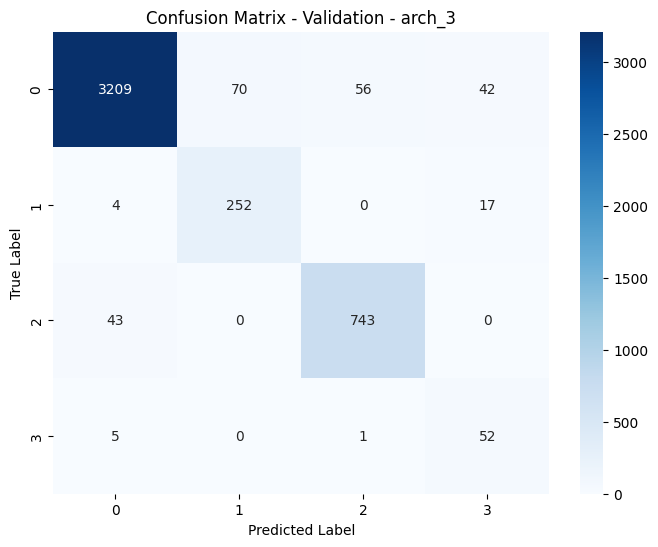

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 1.6894 seconds to execute.
The function took 0.5908 seconds to execute.
The function took 0.7330 seconds to execute.

SUMMARY - Batch: 4:
Train Accuracy: 94.2586%
Validation Accuracy: 94.7040%
Test Accuracy: 94.3925%

################################################################################
BATCH SIZE EXPERIMENT: 64
################################################################################
The device is set to: cuda

Training: arch_3 | Batch: 64
Epoch 20/50, Train Loss: 0.2844, Val Loss: 0.3045
Epoch 40/50, Train Loss: 0.2354, Val Loss: 0.2676
The function took 27.5915 seconds to execute.


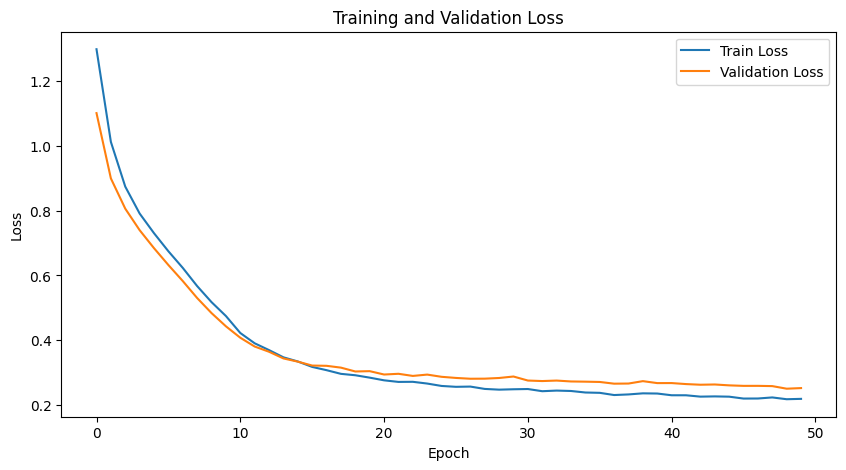

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Batch: 64

Validation - arch_3 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3377
           1       0.74      0.93      0.82       273
           2       0.82      0.96      0.88       786
           3       0.35      0.91      0.51        58

    accuracy                           0.91      4494
   macro avg       0.72      0.93      0.79      4494
weighted avg       0.94      0.91      0.92      4494



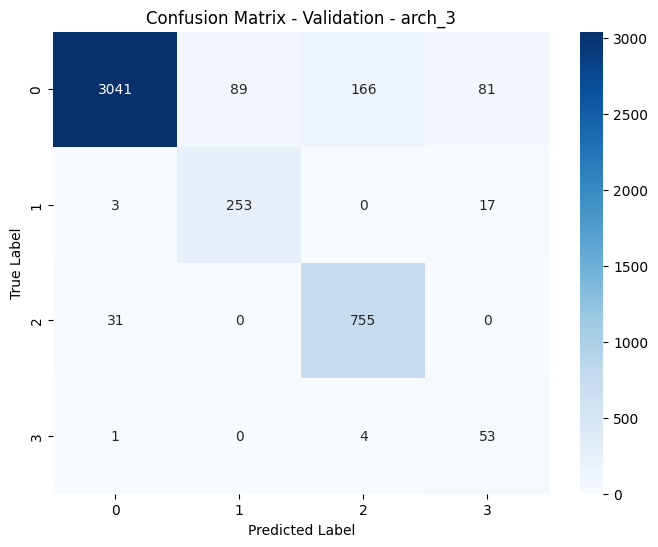

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2103 seconds to execute.
The function took 0.0768 seconds to execute.
The function took 0.0754 seconds to execute.

SUMMARY - Batch: 64:
Train Accuracy: 90.8835%
Validation Accuracy: 91.2773%
Test Accuracy: 90.8545%

################################################################################
BATCH SIZE EXPERIMENT: 256
################################################################################
The device is set to: cuda

Training: arch_3 | Batch: 256
Epoch 20/50, Train Loss: 0.6542, Val Loss: 0.6439
Epoch 40/50, Train Loss: 0.3586, Val Loss: 0.3775
The function took 11.5767 seconds to execute.


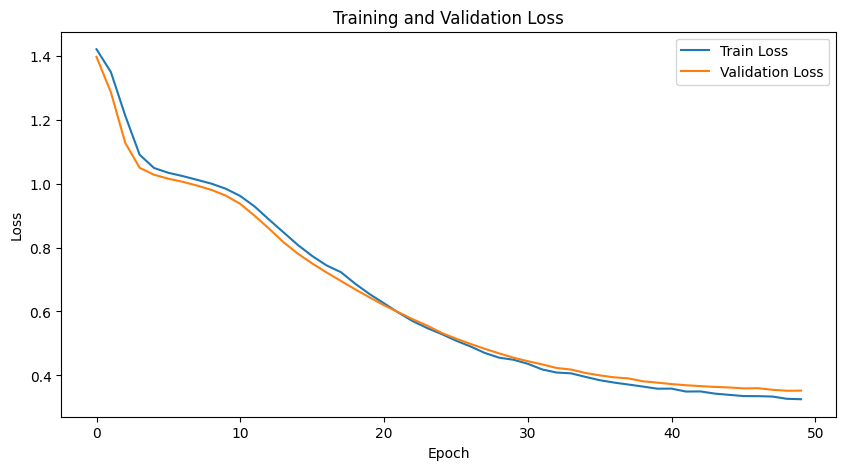

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Batch: 256

Validation - arch_3 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90      3377
           1       0.57      0.93      0.71       273
           2       0.93      0.89      0.91       786
           3       0.10      0.97      0.19        58

    accuracy                           0.84      4494
   macro avg       0.65      0.90      0.68      4494
weighted avg       0.95      0.84      0.88      4494



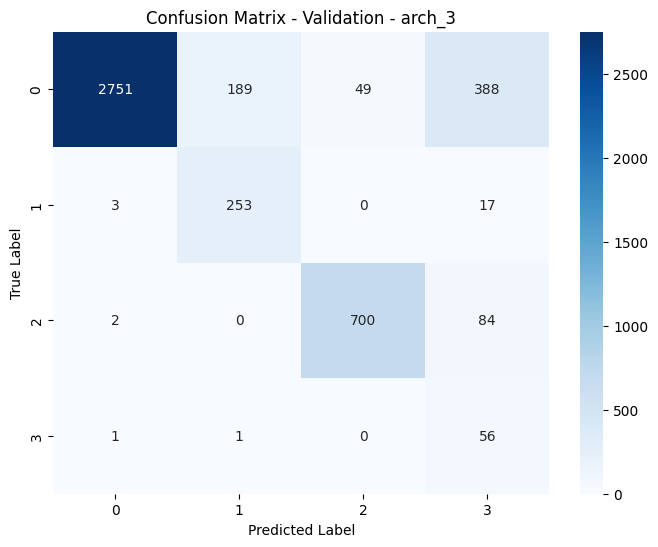

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.1285 seconds to execute.
The function took 0.0389 seconds to execute.
The function took 0.0380 seconds to execute.

SUMMARY - Batch: 256:
Train Accuracy: 83.2728%
Validation Accuracy: 83.6671%
Test Accuracy: 83.7561%

################################################################################
BATCH SIZE EXPERIMENT: 1024
################################################################################
The device is set to: cuda

Training: arch_3 | Batch: 1024
Epoch 20/50, Train Loss: 1.0546, Val Loss: 1.0242
Epoch 40/50, Train Loss: 0.7287, Val Loss: 0.7124
The function took 8.5576 seconds to execute.


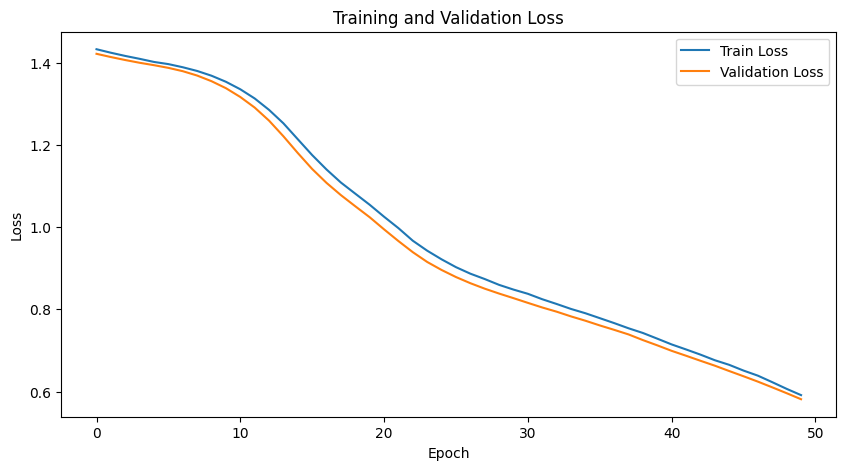

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Batch: 1024

Validation - arch_3 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      3377
           1       0.27      0.91      0.42       273
           2       0.88      0.86      0.87       786
           3       0.14      0.91      0.24        58

    accuracy                           0.75      4494
   macro avg       0.57      0.85      0.59      4494
weighted avg       0.92      0.75      0.80      4494



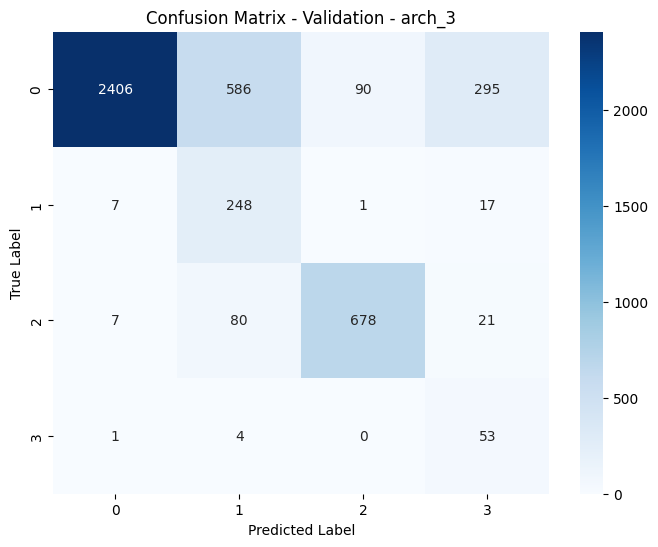

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.1056 seconds to execute.
The function took 0.0299 seconds to execute.
The function took 0.0297 seconds to execute.

SUMMARY - Batch: 1024:
Train Accuracy: 75.5359%
Validation Accuracy: 75.3227%
Test Accuracy: 75.3004%


In [ ]:
# Define batch sizes
batch_sizes = [4, 64, 256, 1024]

#call to the functions
# Define the architecture
architectures = {
    'arch_3': [16, 16, 8, 4],
    #'arch_5': [16, 16, 8, 8, 4],
}
for batch_size in batch_sizes:
  print(f"\n{'#'*80}")
  print(f"BATCH SIZE EXPERIMENT: {batch_size}")
  print(f"{'#'*80}")

  # Create DataLoaders
  train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
  val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
  test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
  val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  print(f"The device is set to: {device}")

  # Train and evaluate all architectures
  for arch_name, hidden_units in architectures.items():
      print(f"\n{'='*50}")
      print(f"Training: {arch_name} | Batch: {batch_size}")
      print(f"{'='*50}")

      # Create model
      model = DeepNN(input_size=15, hidden_units_list=hidden_units)  # 15 features after removing port
      model = model.to(device)

      # Define loss and optimizer
      #criterion = nn.CrossEntropyLoss()
      #optimizer = optim.AdamW(model.parameters(), lr=0.0005)

      weights = torch.tensor(compute_class_weight(class_weight='balanced', classes=y_train_tensor.unique().numpy(), y=y_train_tensor.numpy()), dtype=torch.float).to(device)
      criterion = nn.CrossEntropyLoss(weight=weights)
      optimizer = optim.AdamW(model.parameters(), lr=0.0005)


      training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion,min_delta=0.001, patience=10)


      # Report on classification report per model (using your evaluate_model)
      print(f"\n{'='*40}")
      print(f"CLASSIFICATION REPORT - Batch: {batch_size}")
      print(f"{'='*40}")
      val_accuracy, val_report, _, _ = evaluate_model(model, val_loader, device, f"Validation - {arch_name}")

      # Testing (using your testing_model for quick accuracy)
      train_accuracy = testing_model(model, train_loader, device)
      val_accuracy = testing_model(model, val_loader, device)
      test_accuracy = testing_model(model, test_loader, device)

      print(f'\nSUMMARY - Batch: {batch_size}:')
      print(f'Train Accuracy: {train_accuracy:.4f}%')
      print(f'Validation Accuracy: {val_accuracy:.4f}%')
      print(f'Test Accuracy: {test_accuracy:.4f}%')



- The smaller the batch size, the more precision we have
- The smaller the batch size, the longer it takes, because we update the gradient more frequently, each epoch is longer to process.
- Also smaller batch size have noisy gradients.

Q: Does performance change? And why? Report the validation results.

A:


Q: How long does it take to train the models depending on the batch size? And why?

A: The smaller the batch size, the longer it takes, because we update the gradient more frequently, each epoch is longer to process.

## 5.3 Optimizer


################################################################################
OPTIMIZER EXPERIMENT:
################################################################################
The device is set to: cuda

Training: arch_3 | Optimizer: SGD
Epoch 20/50, Train Loss: 1.3879, Val Loss: 1.3822
Epoch 40/50, Train Loss: 1.3823, Val Loss: 1.3779
The function took 24.0715 seconds to execute.


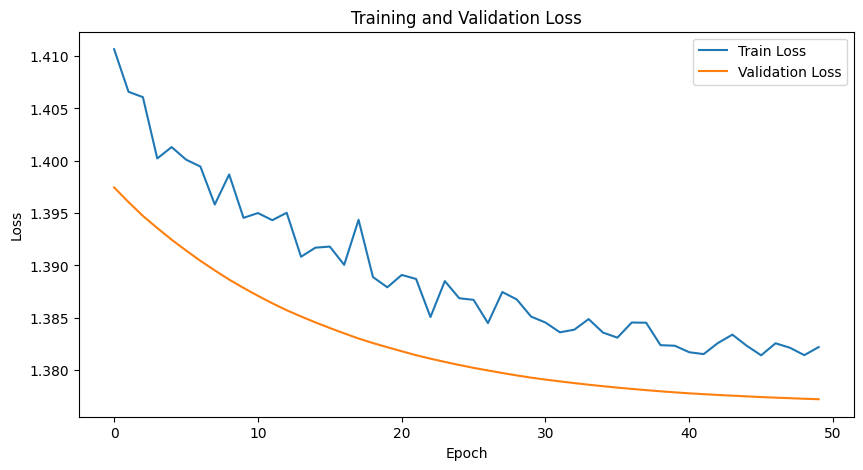

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Optimizer: SGD

Validation - SGD Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3377
           1       0.00      0.00      0.00       273
           2       0.17      1.00      0.30       786
           3       0.00      0.00      0.00        58

    accuracy                           0.17      4494
   macro avg       0.04      0.25      0.07      4494
weighted avg       0.03      0.17      0.05      4494



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

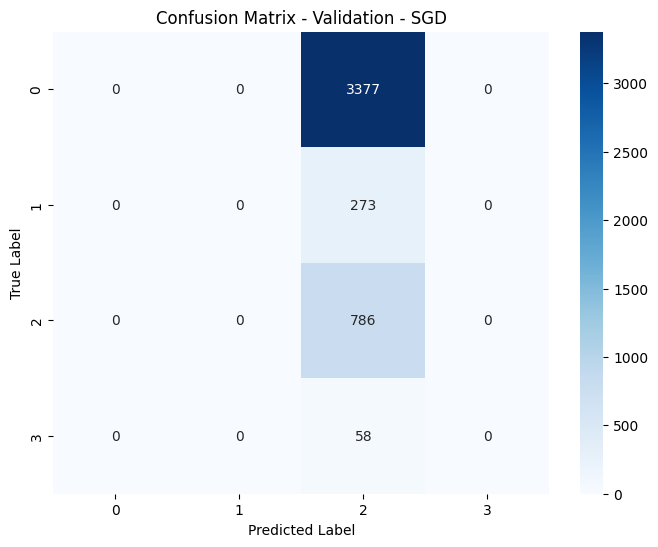

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2007 seconds to execute.
The function took 0.0673 seconds to execute.
The function took 0.0665 seconds to execute.

SUMMARY - Optimizer: SGD:
Train Accuracy: 17.1946%
Validation Accuracy: 17.4900%
Test Accuracy: 17.0004%

Training: arch_3 | Optimizer: SGD_Momentum_0.1
Epoch 20/50, Train Loss: 1.3908, Val Loss: 1.3876
Epoch 40/50, Train Loss: 1.3730, Val Loss: 1.3690
The function took 24.9740 seconds to execute.


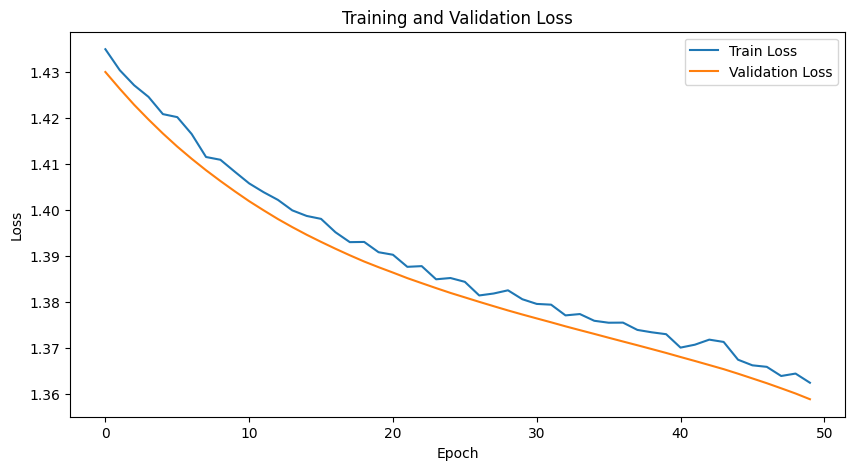

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Optimizer: SGD_Momentum_0.1

Validation - SGD_Momentum_0.1 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      3377
           1       0.00      0.00      0.00       273
           2       0.32      0.02      0.04       786
           3       0.00      0.00      0.00        58

    accuracy                           0.75      4494
   macro avg       0.27      0.25      0.22      4494
weighted avg       0.62      0.75      0.65      4494



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

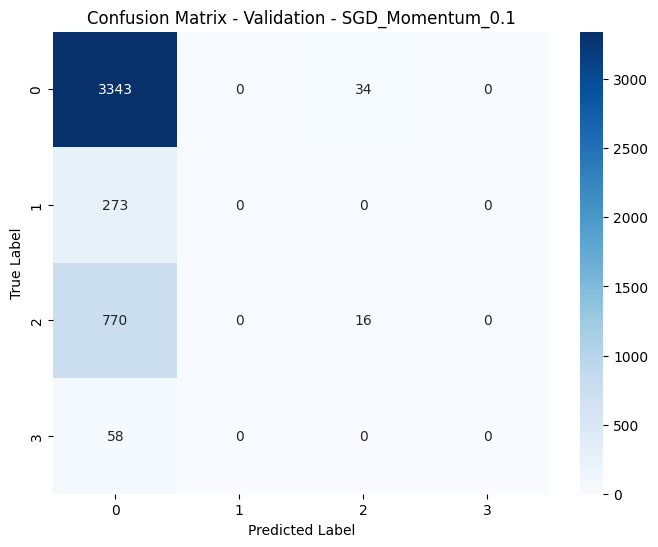

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.1999 seconds to execute.
The function took 0.0666 seconds to execute.
The function took 0.0660 seconds to execute.

SUMMARY - Optimizer: SGD_Momentum_0.1:
Train Accuracy: 74.8980%
Validation Accuracy: 74.7441%
Test Accuracy: 74.8999%

Training: arch_3 | Optimizer: SGD_Momentum_0.5
Epoch 20/50, Train Loss: 1.3818, Val Loss: 1.3779
Epoch 40/50, Train Loss: 1.3759, Val Loss: 1.3732
The function took 24.8909 seconds to execute.


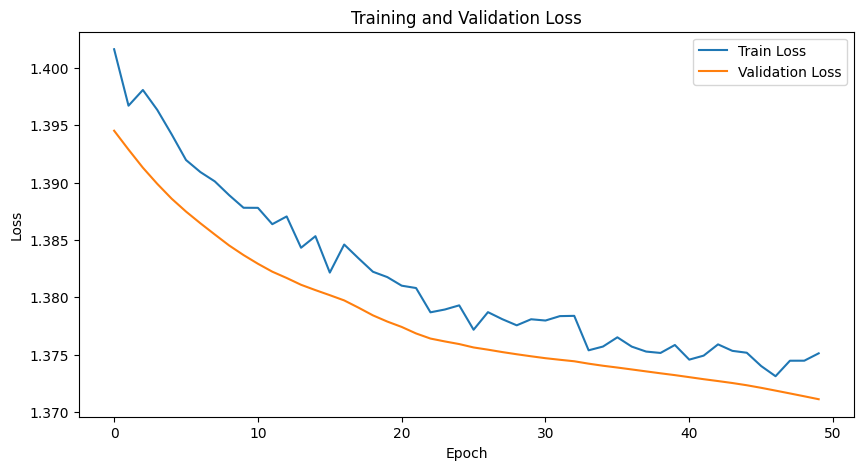

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Optimizer: SGD_Momentum_0.5

Validation - SGD_Momentum_0.5 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84      3377
           1       0.00      0.00      0.00       273
           2       0.27      0.08      0.12       786
           3       0.00      0.00      0.00        58

    accuracy                           0.73      4494
   macro avg       0.26      0.26      0.24      4494
weighted avg       0.61      0.73      0.65      4494



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

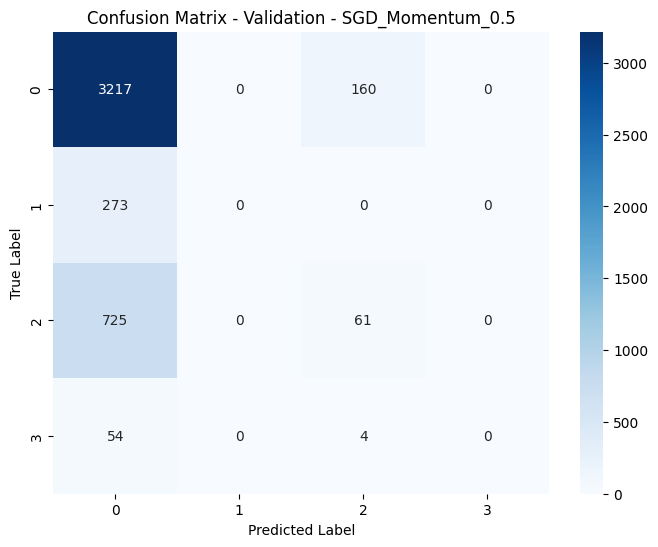

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2122 seconds to execute.
The function took 0.0691 seconds to execute.
The function took 0.0669 seconds to execute.

SUMMARY - Optimizer: SGD_Momentum_0.5:
Train Accuracy: 73.1622%
Validation Accuracy: 72.9417%
Test Accuracy: 73.5870%

Training: arch_3 | Optimizer: SGD_Momentum_0.9
Epoch 20/50, Train Loss: 0.9637, Val Loss: 0.9468
Epoch 40/50, Train Loss: 0.9322, Val Loss: 0.9114
The function took 25.2903 seconds to execute.


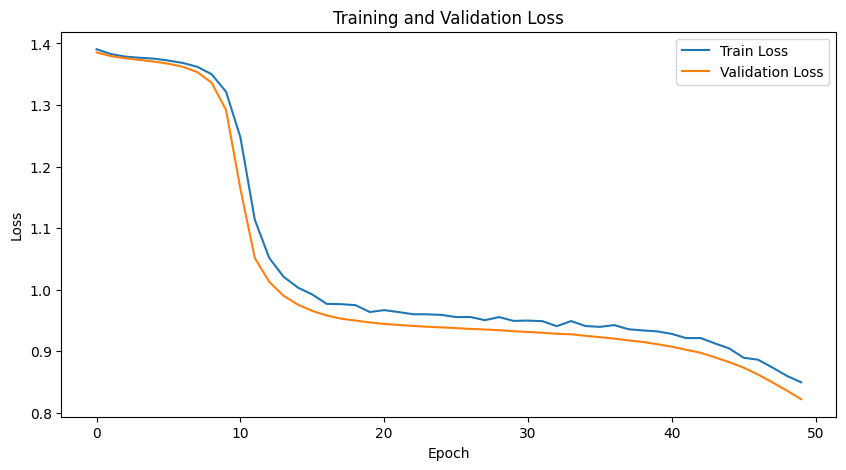

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Optimizer: SGD_Momentum_0.9

Validation - SGD_Momentum_0.9 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3377
           1       0.28      0.84      0.42       273
           2       0.97      0.87      0.92       786
           3       0.00      0.00      0.00        58

    accuracy                           0.84      4494
   macro avg       0.55      0.64      0.56      4494
weighted avg       0.91      0.84      0.86      4494



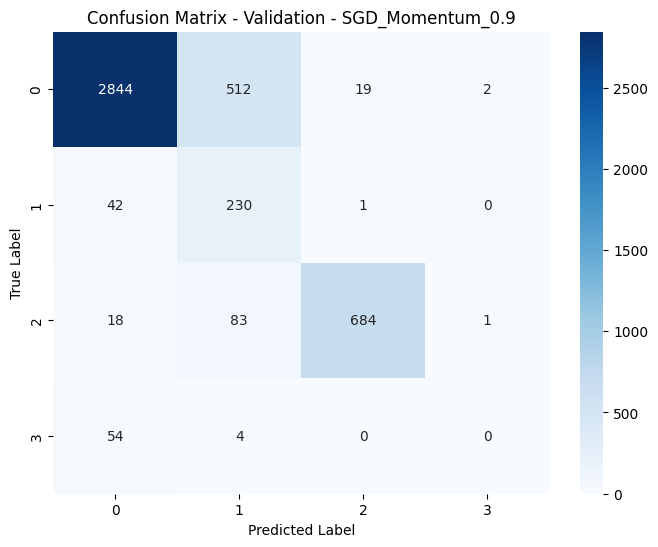

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2200 seconds to execute.
The function took 0.0689 seconds to execute.
The function took 0.0681 seconds to execute.

SUMMARY - Optimizer: SGD_Momentum_0.9:
Train Accuracy: 84.0813%
Validation Accuracy: 83.6226%
Test Accuracy: 83.8896%

Training: arch_3 | Optimizer: AdamW
Epoch 20/50, Train Loss: 0.2199, Val Loss: 0.2675
Early stopping at epoch 34 (best val loss: 0.249277)
The function took 18.8565 seconds to execute.


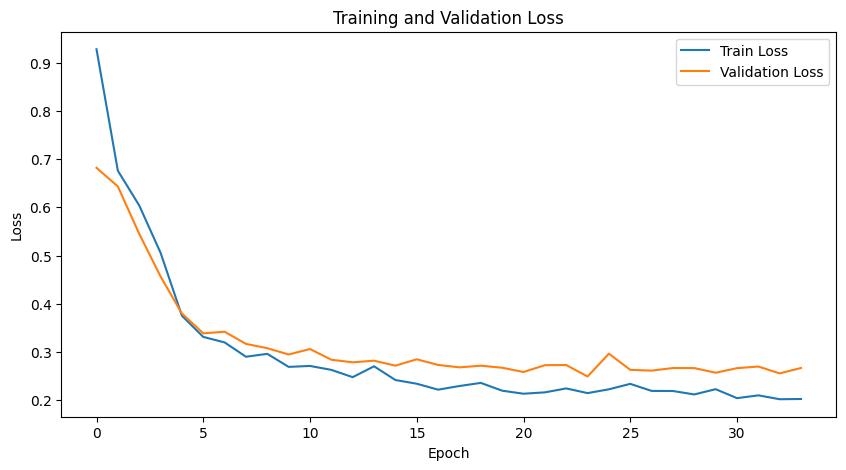

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Optimizer: AdamW

Validation - AdamW Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3377
           1       0.78      0.93      0.85       273
           2       0.75      0.96      0.84       786
           3       0.40      0.91      0.55        58

    accuracy                           0.90      4494
   macro avg       0.73      0.92      0.80      4494
weighted avg       0.93      0.90      0.91      4494



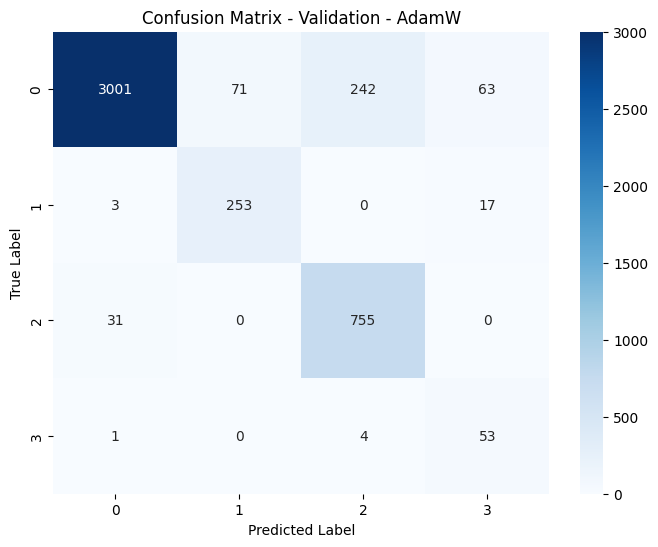

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2154 seconds to execute.
The function took 0.0722 seconds to execute.
The function took 0.0669 seconds to execute.

SUMMARY - Optimizer: AdamW:
Train Accuracy: 89.5260%
Validation Accuracy: 90.3872%
Test Accuracy: 90.0534%


In [ ]:
# Define batch sizes
batch_sizes = 64

#call to the functions
# Define the architecture
architecture = [16, 16, 8, 4]

# Define optimizers to test
optimizers_config = {
    'SGD': optim.SGD,
    'SGD_Momentum_0.1': lambda params: optim.SGD(params, momentum=0.1),
    'SGD_Momentum_0.5': lambda params: optim.SGD(params, momentum=0.5),
    'SGD_Momentum_0.9': lambda params: optim.SGD(params, momentum=0.9),
    'AdamW': optim.AdamW
}

print(f"\n{'#'*80}")
print(f"OPTIMIZER EXPERIMENT:")
print(f"{'#'*80}")

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_sizes, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_sizes, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_sizes, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"The device is set to: {device}")

# Train and evaluate all architectures
for opt_name, opt_class in optimizers_config.items():
    print(f"\n{'='*50}")
    print(f"Training: arch_3 | Optimizer: {opt_name}")
    print(f"{'='*50}")

    # Create model
    model = DeepNN(input_size=15, hidden_units_list= architecture)  # 15 features after removing port
    model = model.to(device)

    # Define loss and optimizer
    weights = torch.tensor(compute_class_weight(class_weight='balanced', classes=y_train_tensor.unique().numpy(), y=y_train_tensor.numpy()), dtype=torch.float).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)
    if opt_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=0.0005)
    elif opt_name == 'SGD_Momentum_0.1':
        optimizer = optim.SGD(model.parameters(), lr=0.0005, momentum=0.1)
    elif opt_name == 'SGD_Momentum_0.5':
        optimizer = optim.SGD(model.parameters(), lr=0.0005, momentum=0.5)
    elif opt_name == 'SGD_Momentum_0.9':
        optimizer = optim.SGD(model.parameters(), lr=0.0005, momentum=0.9)
    else:  # AdamW
        optimizer = optim.AdamW(model.parameters(), lr=0.005)


    training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion,min_delta=0.001, patience=10)


    # Report on classification report per model (using your evaluate_model)
    print(f"\n{'='*40}")
    print(f"CLASSIFICATION REPORT - Optimizer: {opt_name}")
    print(f"{'='*40}")
    val_accuracy, val_report, _, _ = evaluate_model(model, val_loader, device, f"Validation - {opt_name}")

    # Testing (using your testing_model for quick accuracy)
    train_accuracy = testing_model(model, train_loader, device)
    val_accuracy = testing_model(model, val_loader, device)
    test_accuracy = testing_model(model, test_loader, device)

    print(f'\nSUMMARY - Optimizer: {opt_name}:')
    print(f'Train Accuracy: {train_accuracy:.4f}%')
    print(f'Validation Accuracy: {val_accuracy:.4f}%')
    print(f'Test Accuracy: {test_accuracy:.4f}%')




Training: arch_3 | Optimizer: AdamW | Learning rate: 0.0001
Epoch 20/50, Train Loss: 0.8774, Val Loss: 0.8606
Epoch 40/50, Train Loss: 0.7478, Val Loss: 0.7447
The function took 27.8622 seconds to execute.


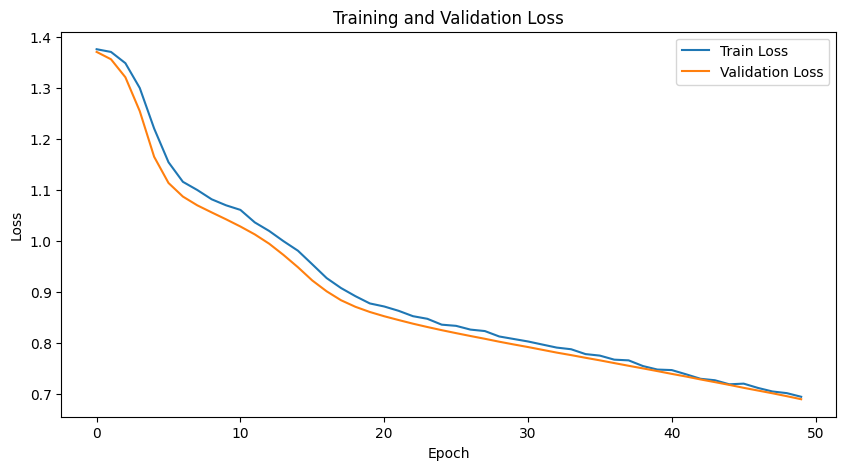

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Learning rate: 0.0001

Validation - AdamW Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      3377
           1       0.50      0.88      0.64       273
           2       0.98      0.87      0.92       786
           3       0.09      0.84      0.17        58

    accuracy                           0.81      4494
   macro avg       0.63      0.85      0.65      4494
weighted avg       0.93      0.81      0.86      4494



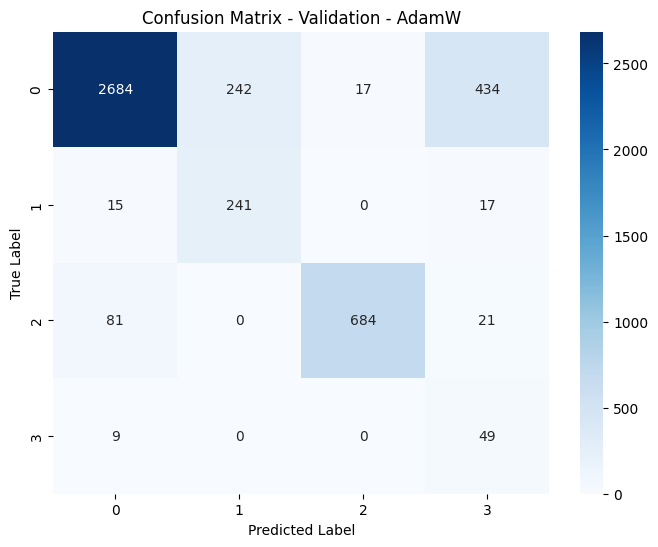

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2031 seconds to execute.
The function took 0.0699 seconds to execute.
The function took 0.0718 seconds to execute.

SUMMARY - Optimizer: AdamW:
Train Accuracy: 81.0474%
Validation Accuracy: 81.3974%
Test Accuracy: 81.4642%

Training: arch_3 | Optimizer: AdamW | Learning rate: 0.0005
Epoch 20/50, Train Loss: 0.2504, Val Loss: 0.2689
Epoch 40/50, Train Loss: 0.2195, Val Loss: 0.2461
The function took 27.6117 seconds to execute.


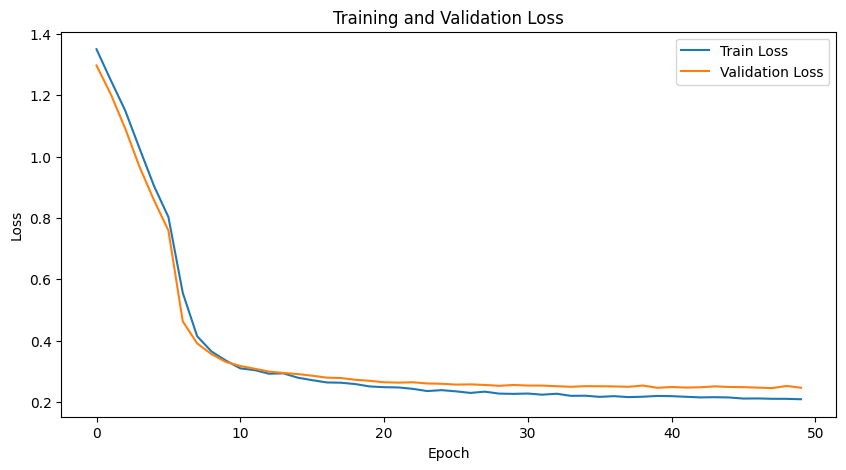

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Learning rate: 0.0005

Validation - AdamW Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3377
           1       0.73      0.92      0.81       273
           2       0.96      0.89      0.92       786
           3       0.19      0.98      0.32        58

    accuracy                           0.91      4494
   macro avg       0.72      0.93      0.75      4494
weighted avg       0.96      0.91      0.93      4494



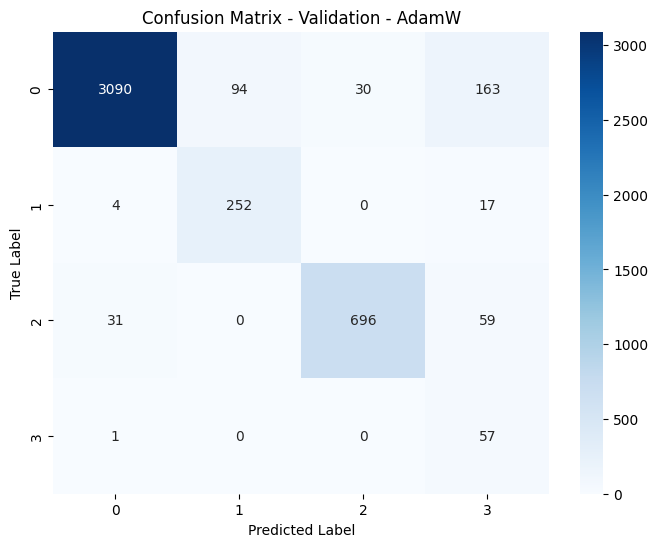

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.3022 seconds to execute.
The function took 0.0944 seconds to execute.
The function took 0.0960 seconds to execute.

SUMMARY - Optimizer: AdamW:
Train Accuracy: 91.0170%
Validation Accuracy: 91.1215%
Test Accuracy: 90.9212%

Training: arch_3 | Optimizer: AdamW | Learning rate: 0.0008
Epoch 20/50, Train Loss: 0.3014, Val Loss: 0.3382
Epoch 40/50, Train Loss: 0.2065, Val Loss: 0.2618
Early stopping at epoch 46 (best val loss: 0.255276)
The function took 26.0524 seconds to execute.


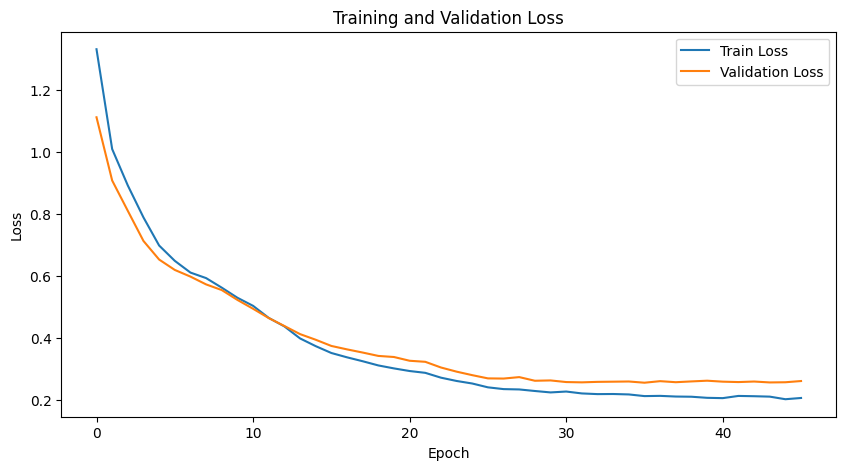

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Learning rate: 0.0008

Validation - AdamW Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3377
           1       0.74      0.92      0.82       273
           2       0.88      0.88      0.88       786
           3       0.17      0.97      0.29        58

    accuracy                           0.89      4494
   macro avg       0.70      0.92      0.73      4494
weighted avg       0.94      0.89      0.91      4494



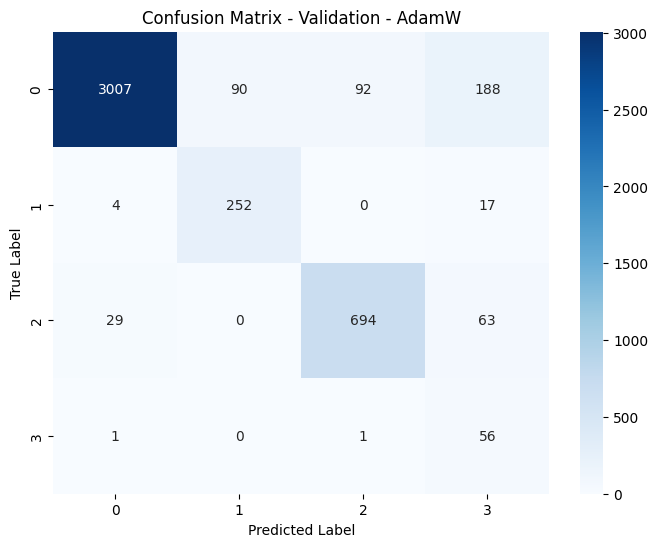

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2111 seconds to execute.
The function took 0.0715 seconds to execute.
The function took 0.0665 seconds to execute.

SUMMARY - Optimizer: AdamW:
Train Accuracy: 88.9103%
Validation Accuracy: 89.2078%
Test Accuracy: 88.4513%

Training: arch_3 | Optimizer: AdamW | Learning rate: 0.001
Epoch 20/50, Train Loss: 0.4635, Val Loss: 0.4807
Epoch 40/50, Train Loss: 0.3232, Val Loss: 0.3761
The function took 27.5537 seconds to execute.


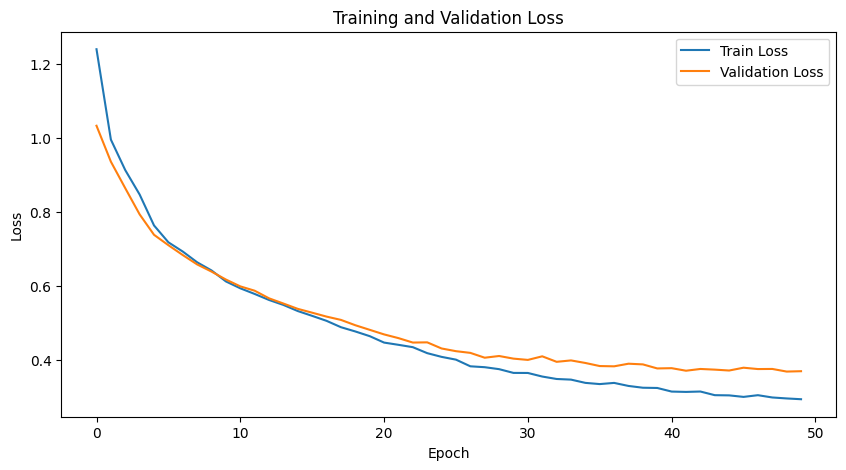

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Learning rate: 0.001

Validation - AdamW Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3377
           1       0.79      0.93      0.85       273
           2       0.99      0.87      0.93       786
           3       0.13      0.98      0.24        58

    accuracy                           0.89      4494
   macro avg       0.73      0.92      0.74      4494
weighted avg       0.97      0.89      0.92      4494



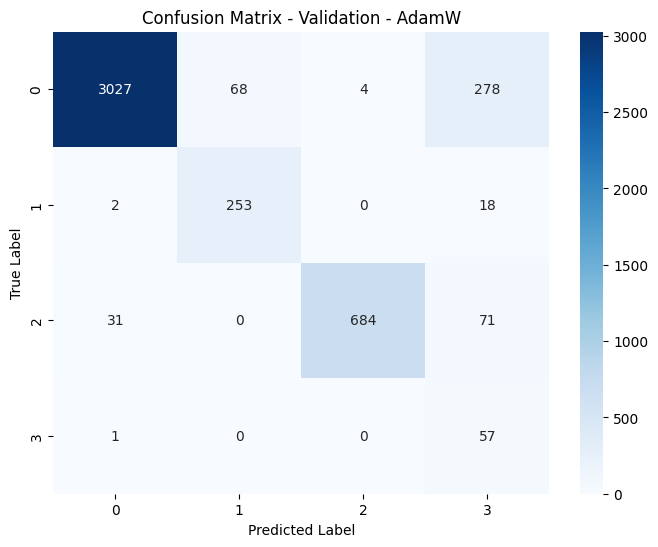

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2197 seconds to execute.
The function took 0.0723 seconds to execute.
The function took 0.0695 seconds to execute.

SUMMARY - Optimizer: AdamW:
Train Accuracy: 89.1699%
Validation Accuracy: 89.4749%
Test Accuracy: 89.0298%

Training: arch_3 | Optimizer: AdamW | Learning rate: 0.005
Epoch 20/50, Train Loss: 0.2607, Val Loss: 0.2925
Epoch 40/50, Train Loss: 0.2320, Val Loss: 0.2744
The function took 27.4178 seconds to execute.


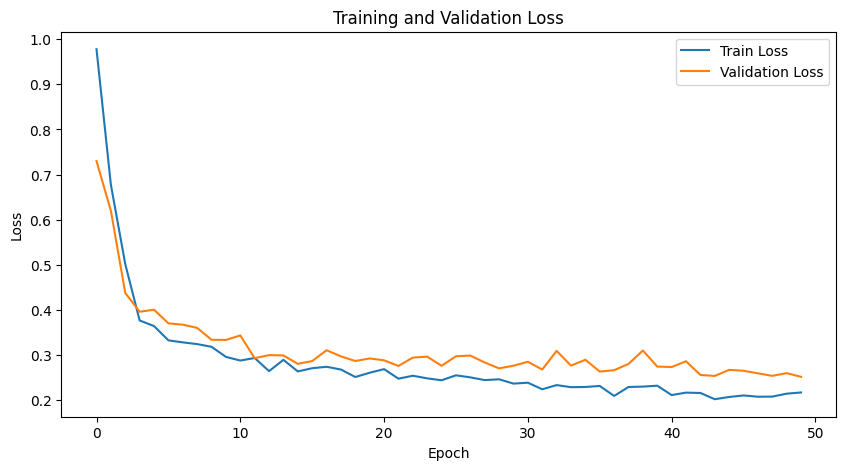

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Learning rate: 0.005

Validation - AdamW Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      3377
           1       0.77      0.92      0.84       273
           2       0.75      0.98      0.85       786
           3       0.27      0.97      0.42        58

    accuracy                           0.89      4494
   macro avg       0.70      0.93      0.76      4494
weighted avg       0.93      0.89      0.90      4494



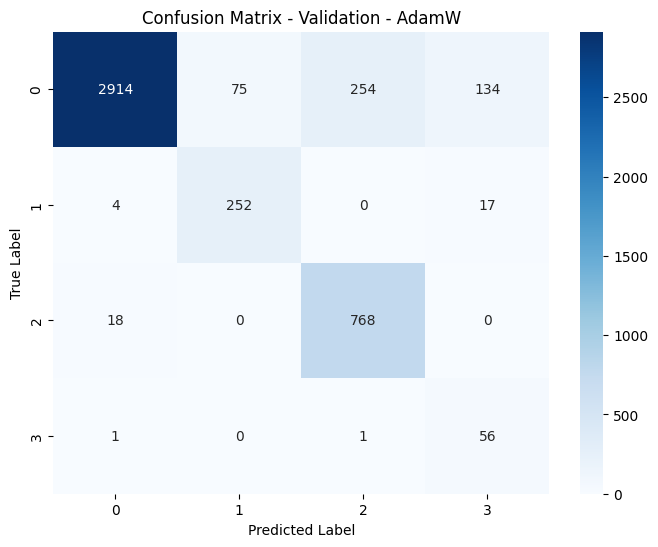

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2609 seconds to execute.
The function took 0.0989 seconds to execute.
The function took 0.0946 seconds to execute.

SUMMARY - Optimizer: AdamW:
Train Accuracy: 88.8732%
Validation Accuracy: 88.7850%
Test Accuracy: 88.6293%

Training: arch_3 | Optimizer: AdamW | Learning rate: 0.008
Epoch 20/50, Train Loss: 0.2143, Val Loss: 0.2654
Epoch 40/50, Train Loss: 0.2081, Val Loss: 0.2747
Early stopping at epoch 40 (best val loss: 0.241931)
The function took 22.0978 seconds to execute.


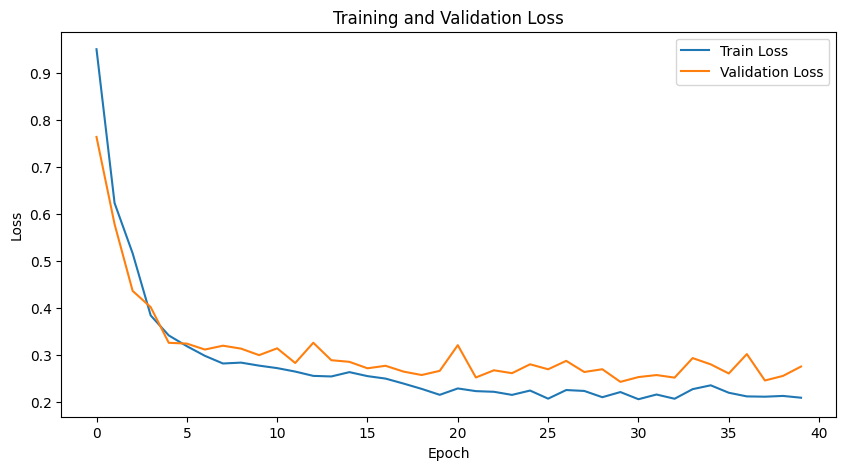

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Learning rate: 0.008

Validation - AdamW Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3377
           1       0.75      0.92      0.83       273
           2       0.78      0.97      0.87       786
           3       0.43      0.91      0.59        58

    accuracy                           0.91      4494
   macro avg       0.74      0.93      0.81      4494
weighted avg       0.93      0.91      0.92      4494



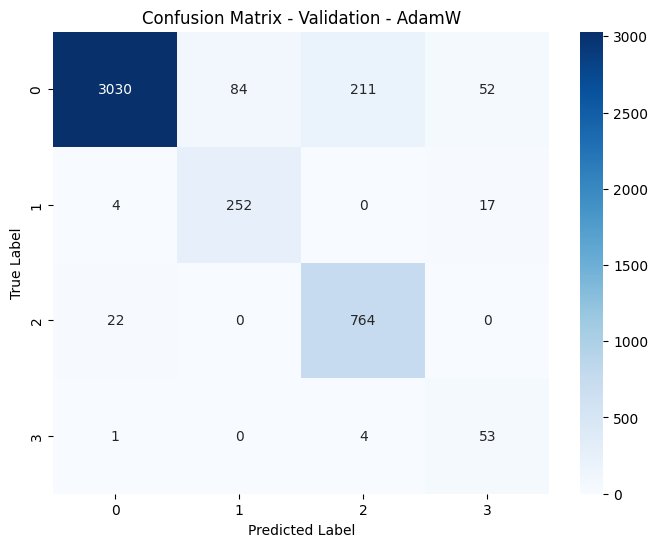

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2514 seconds to execute.
The function took 0.1039 seconds to execute.
The function took 0.0956 seconds to execute.

SUMMARY - Optimizer: AdamW:
Train Accuracy: 91.0986%
Validation Accuracy: 91.2105%
Test Accuracy: 90.6987%

Training: arch_3 | Optimizer: AdamW | Learning rate: 0.01
Early stopping at epoch 17 (best val loss: 1.376734)
The function took 10.1664 seconds to execute.


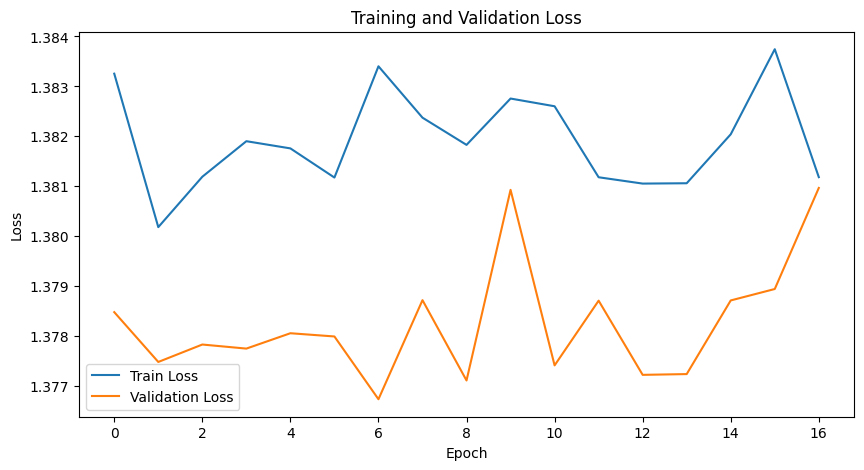

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Learning rate: 0.01

Validation - AdamW Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      3377
           1       0.00      0.00      0.00       273
           2       0.00      0.00      0.00       786
           3       0.00      0.00      0.00        58

    accuracy                           0.75      4494
   macro avg       0.19      0.25      0.21      4494
weighted avg       0.56      0.75      0.64      4494



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

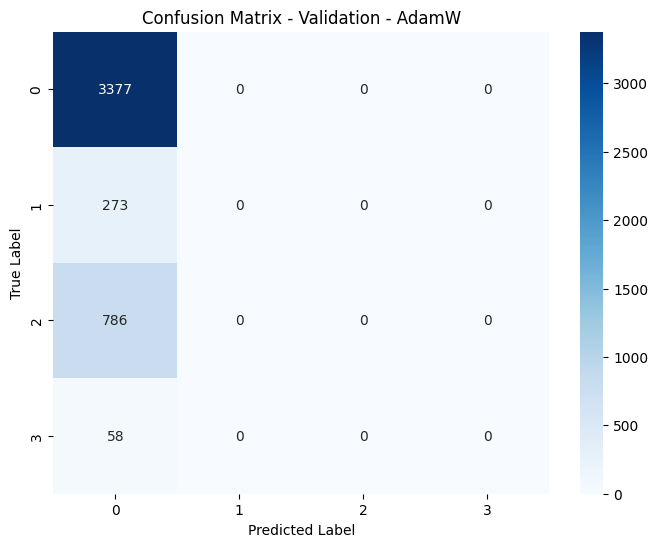

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2093 seconds to execute.
The function took 0.0663 seconds to execute.
The function took 0.0668 seconds to execute.

SUMMARY - Optimizer: AdamW:
Train Accuracy: 75.1650%
Validation Accuracy: 75.1446%
Test Accuracy: 75.1891%


In [ ]:
batch_sizes = 64
architecture = [16, 16, 8, 4]

# Trying AdamW with different learning rates
for lr in [0.0001, 0.0005, 0.0008, 0.001, 0.005, 0.008, 0.01]:
    print(f"\n{'='*60}")
    print(f"Training: arch_3 | Optimizer: AdamW | Learning rate: {lr}")
    print(f"{'='*60}")

    # Create model
    model = DeepNN(input_size=15, hidden_units_list= architecture)  # 15 features after removing port
    model = model.to(device)

    # Define loss and optimizer
    #criterion = nn.CrossEntropyLoss()
    weights = torch.tensor(compute_class_weight(class_weight='balanced', classes=y_train_tensor.unique().numpy(), y=y_train_tensor.numpy()), dtype=torch.float).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)
    optimizer = optim.AdamW(model.parameters(), lr=lr)
    training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion,min_delta=0.001, patience=10)


    # Report on classification report per model (using your evaluate_model)
    print(f"\n{'='*50}")
    print(f"CLASSIFICATION REPORT - Learning rate: {lr}")
    print(f"{'='*50}")
    val_accuracy, val_report, _, _ = evaluate_model(model, val_loader, device, f"Validation - {opt_name}")

    # Testing (using your testing_model for quick accuracy)
    train_accuracy = testing_model(model, train_loader, device)
    val_accuracy = testing_model(model, val_loader, device)
    test_accuracy = testing_model(model, test_loader, device)

    print(f'\nSUMMARY - Optimizer: {opt_name}:')
    print(f'Train Accuracy: {train_accuracy:.4f}%')
    print(f'Validation Accuracy: {val_accuracy:.4f}%')
    print(f'Test Accuracy: {test_accuracy:.4f}%')


Training: arch_3 | Optimizer: AdamW | num_epochs: 50
Epoch 20/50, Train Loss: 0.2841, Val Loss: 0.3402
Epoch 40/50, Train Loss: 0.2368, Val Loss: 0.2810
The function took 27.5316 seconds to execute.


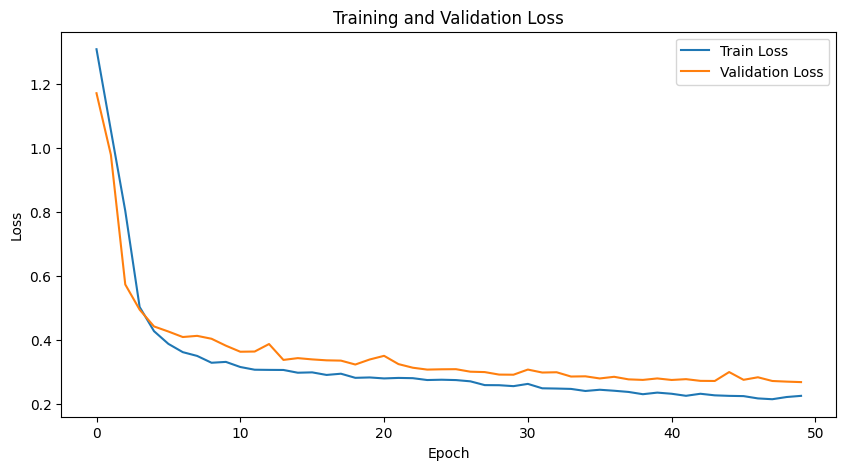

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Num epochs: 50

Validation - AdamW Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      3377
           1       0.73      0.93      0.82       273
           2       0.85      0.96      0.90       786
           3       0.21      0.95      0.35        58

    accuracy                           0.90      4494
   macro avg       0.70      0.93      0.75      4494
weighted avg       0.94      0.90      0.91      4494



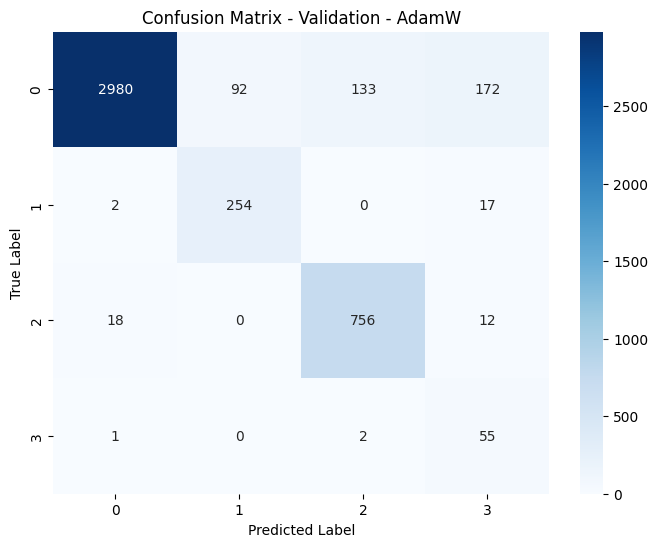

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2221 seconds to execute.
The function took 0.0782 seconds to execute.
The function took 0.0686 seconds to execute.

SUMMARY - Optimizer: AdamW:
Train Accuracy: 89.6224%
Validation Accuracy: 90.0089%
Test Accuracy: 89.8531%

Training: arch_3 | Optimizer: AdamW | num_epochs: 60
Epoch 20/60, Train Loss: 0.4015, Val Loss: 0.4062
Epoch 40/60, Train Loss: 0.2315, Val Loss: 0.2431
Epoch 60/60, Train Loss: 0.2138, Val Loss: 0.2312
The function took 33.0953 seconds to execute.


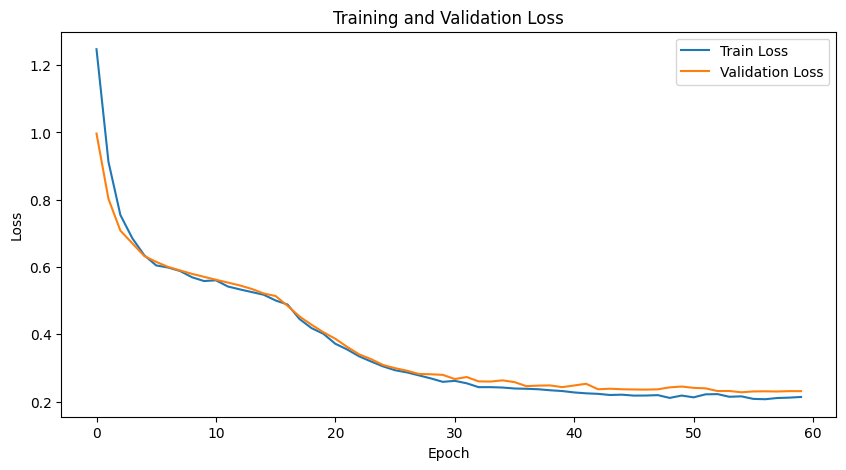

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Num epochs: 60

Validation - AdamW Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3377
           1       0.74      0.92      0.82       273
           2       0.79      0.97      0.87       786
           3       0.41      0.91      0.57        58

    accuracy                           0.91      4494
   macro avg       0.73      0.93      0.80      4494
weighted avg       0.93      0.91      0.92      4494



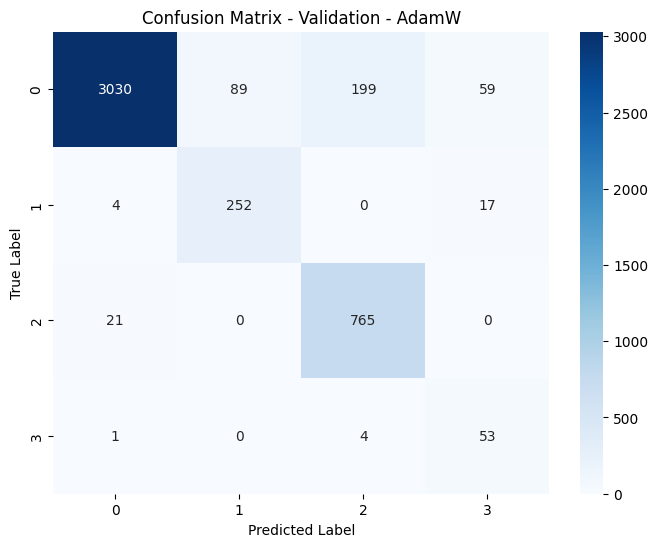

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2010 seconds to execute.
The function took 0.0677 seconds to execute.
The function took 0.0675 seconds to execute.

SUMMARY - Optimizer: AdamW:
Train Accuracy: 90.8909%
Validation Accuracy: 91.2328%
Test Accuracy: 90.9880%

Training: arch_3 | Optimizer: AdamW | num_epochs: 70
Epoch 20/70, Train Loss: 0.2727, Val Loss: 0.3085
Epoch 40/70, Train Loss: 0.2072, Val Loss: 0.2392
Early stopping at epoch 54 (best val loss: 0.235214)
The function took 29.1940 seconds to execute.


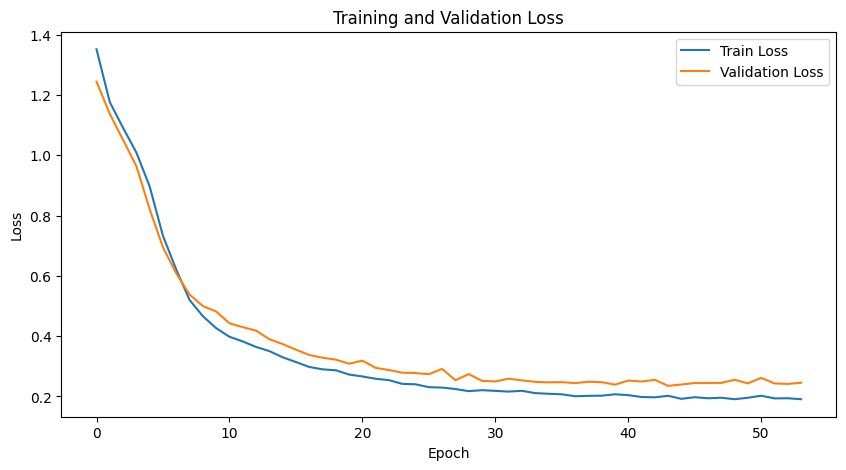

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Num epochs: 70

Validation - AdamW Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3377
           1       0.73      0.93      0.82       273
           2       0.84      0.96      0.89       786
           3       0.30      0.91      0.46        58

    accuracy                           0.91      4494
   macro avg       0.71      0.93      0.78      4494
weighted avg       0.94      0.91      0.92      4494



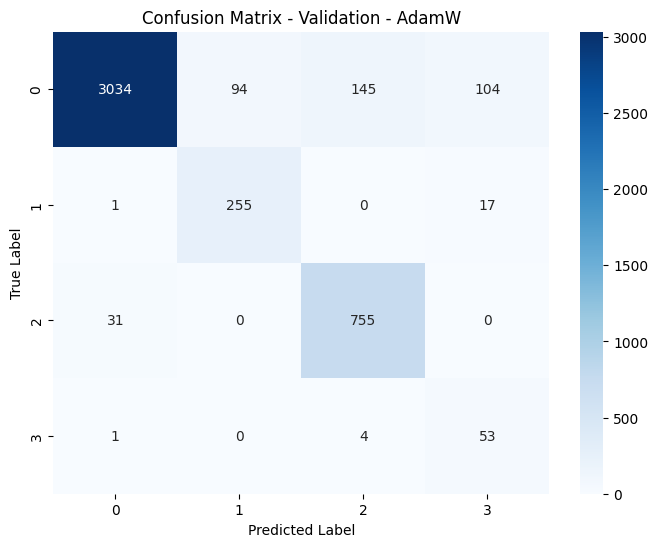

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2076 seconds to execute.
The function took 0.0671 seconds to execute.
The function took 0.0675 seconds to execute.

SUMMARY - Optimizer: AdamW:
Train Accuracy: 90.7648%
Validation Accuracy: 91.1660%
Test Accuracy: 90.8322%

Training: arch_3 | Optimizer: AdamW | num_epochs: 80
Epoch 20/80, Train Loss: 0.2895, Val Loss: 0.3477
Epoch 40/80, Train Loss: 0.2152, Val Loss: 0.2991
Early stopping at epoch 50 (best val loss: 0.299144)
The function took 27.7106 seconds to execute.


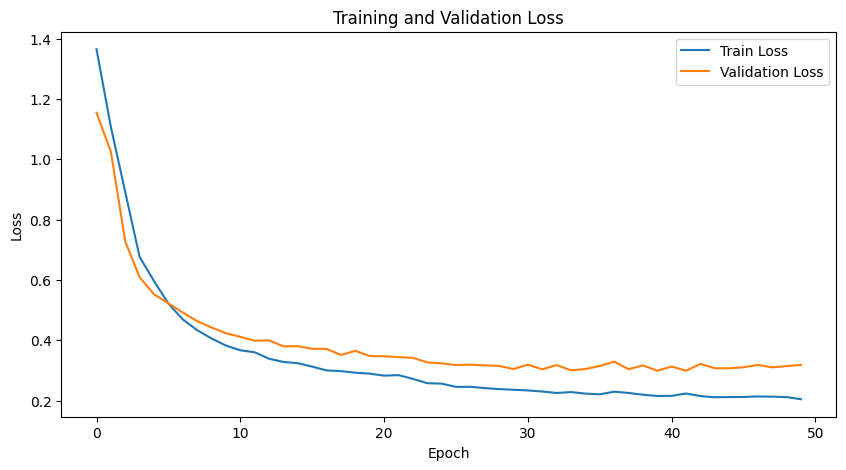

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Num epochs: 80

Validation - AdamW Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3377
           1       0.74      0.92      0.82       273
           2       1.00      0.87      0.93       786
           3       0.33      0.93      0.49        58

    accuracy                           0.94      4494
   macro avg       0.76      0.92      0.80      4494
weighted avg       0.95      0.94      0.94      4494



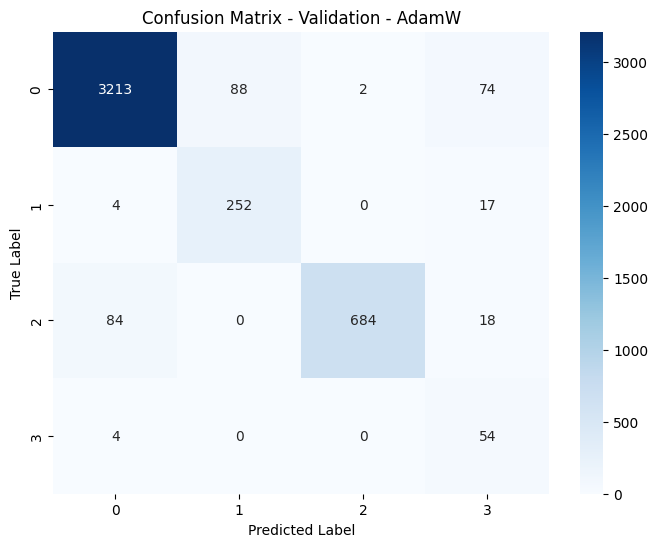

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2036 seconds to execute.
The function took 0.0684 seconds to execute.
The function took 0.0680 seconds to execute.

SUMMARY - Optimizer: AdamW:
Train Accuracy: 93.1311%
Validation Accuracy: 93.5247%
Test Accuracy: 92.7904%

Training: arch_3 | Optimizer: AdamW | num_epochs: 90
Epoch 20/90, Train Loss: 0.2427, Val Loss: 0.2861
Epoch 40/90, Train Loss: 0.1923, Val Loss: 0.2527
Early stopping at epoch 52 (best val loss: 0.247605)
The function took 28.5385 seconds to execute.


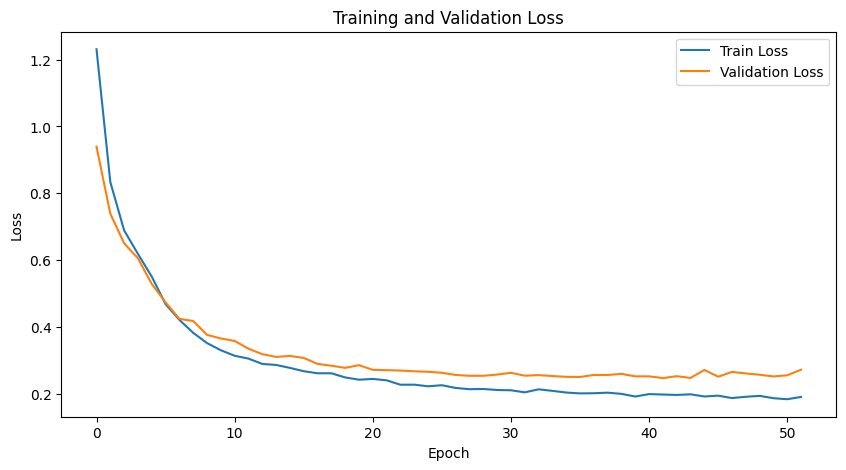

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Num epochs: 90

Validation - AdamW Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3377
           1       0.74      0.92      0.82       273
           2       0.91      0.93      0.92       786
           3       0.34      0.93      0.49        58

    accuracy                           0.93      4494
   macro avg       0.74      0.93      0.80      4494
weighted avg       0.95      0.93      0.94      4494



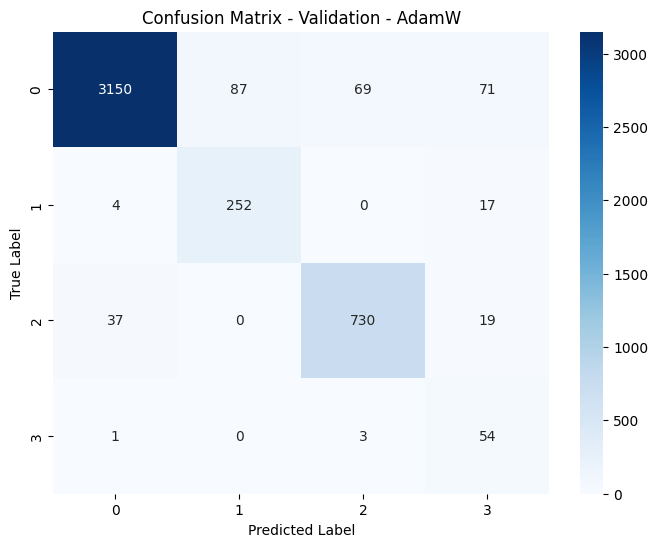

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2193 seconds to execute.
The function took 0.0706 seconds to execute.
The function took 0.0700 seconds to execute.

SUMMARY - Optimizer: AdamW:
Train Accuracy: 92.7824%
Validation Accuracy: 93.1464%
Test Accuracy: 92.8126%

Training: arch_3 | Optimizer: AdamW | num_epochs: 100
Epoch 20/100, Train Loss: 0.2327, Val Loss: 0.2572
Epoch 40/100, Train Loss: 0.1999, Val Loss: 0.2328
Early stopping at epoch 45 (best val loss: 0.230432)
The function took 24.7423 seconds to execute.


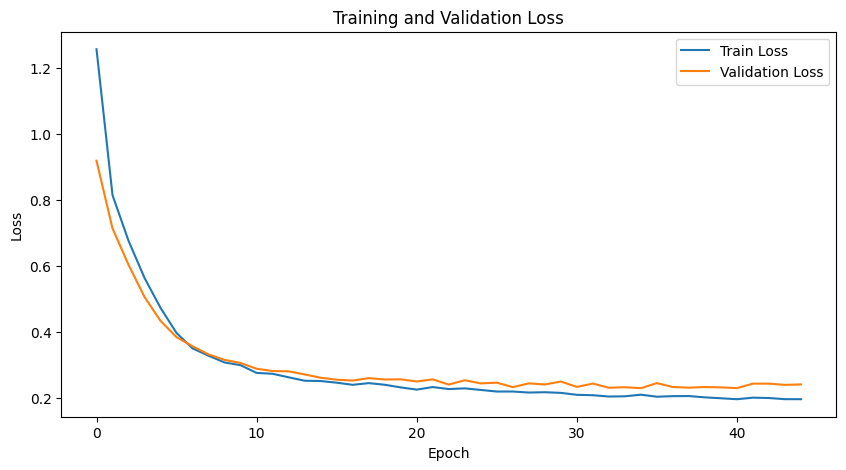

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION REPORT - Num epochs: 100

Validation - AdamW Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3377
           1       0.74      0.92      0.82       273
           2       0.89      0.97      0.93       786
           3       0.37      0.91      0.53        58

    accuracy                           0.93      4494
   macro avg       0.75      0.93      0.81      4494
weighted avg       0.95      0.93      0.94      4494



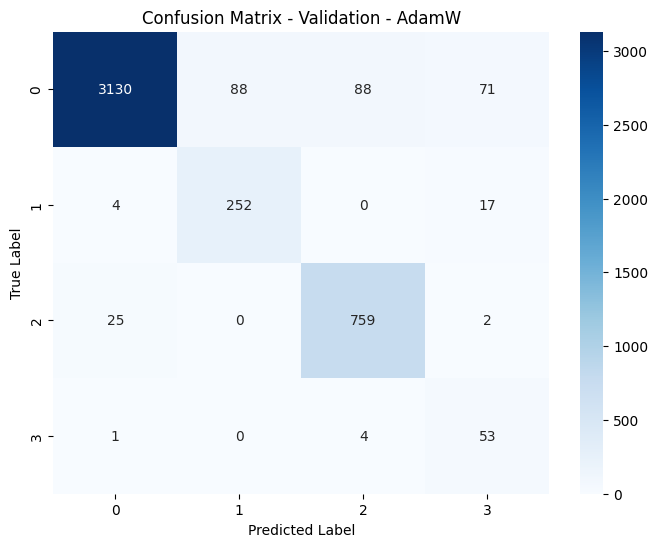

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.2042 seconds to execute.
The function took 0.0670 seconds to execute.
The function took 0.0645 seconds to execute.

SUMMARY - Optimizer: AdamW:
Train Accuracy: 92.5080%
Validation Accuracy: 93.3244%
Test Accuracy: 92.3231%


In [ ]:
# Trying AdamW with different epochs
for num_epochs in [50, 60, 70, 80, 90, 100]:
    print(f"\n{'='*60}")
    print(f"Training: arch_3 | Optimizer: AdamW | num_epochs: {num_epochs}")
    print(f"{'='*60}")

    # Create model
    model = DeepNN(input_size=15, hidden_units_list= architecture)  # 15 features after removing port
    model = model.to(device)

    # Define loss and optimizer
    #criterion = nn.CrossEntropyLoss()
    weights = torch.tensor(compute_class_weight(class_weight='balanced', classes=y_train_tensor.unique().numpy(), y=y_train_tensor.numpy()), dtype=torch.float).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)
    optimizer = optim.AdamW(model.parameters(), lr=0.001)
    training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion,num_epochs=num_epochs, min_delta=0.001, patience=10)


    # Report on classification report per model (using your evaluate_model)
    print(f"\n{'='*50}")
    print(f"CLASSIFICATION REPORT - Num epochs: {num_epochs}")
    print(f"{'='*50}")
    val_accuracy, val_report, _, _ = evaluate_model(model, val_loader, device, f"Validation - {opt_name}")

    # Testing (using your testing_model for quick accuracy)
    train_accuracy = testing_model(model, train_loader, device)
    val_accuracy = testing_model(model, val_loader, device)
    test_accuracy = testing_model(model, test_loader, device)

    print(f'\nSUMMARY - Optimizer: {opt_name}:')
    print(f'Train Accuracy: {train_accuracy:.4f}%')
    print(f'Validation Accuracy: {val_accuracy:.4f}%')
    print(f'Test Accuracy: {test_accuracy:.4f}%')

#### Question

Q: Is there a difference in the trend of the loss functions?

A: Yes, all the functions converge but in different ways and with different pace


Q: How long does it take to train the models with the different optimizers? And why?

A:


Q: Now, focus on the architecture with the best optimizer. Evaluate the effects of the different learning rates and epochs. Report the test results for
the best model.

A:

# 6 Overfitting

The device is set to: cuda

No normalization applied
Epoch 20/50, Train Loss: 0.2025, Val Loss: 0.2513
Early stopping at epoch 30 (best val loss: 0.251313)
The function took 11.2430 seconds to execute.


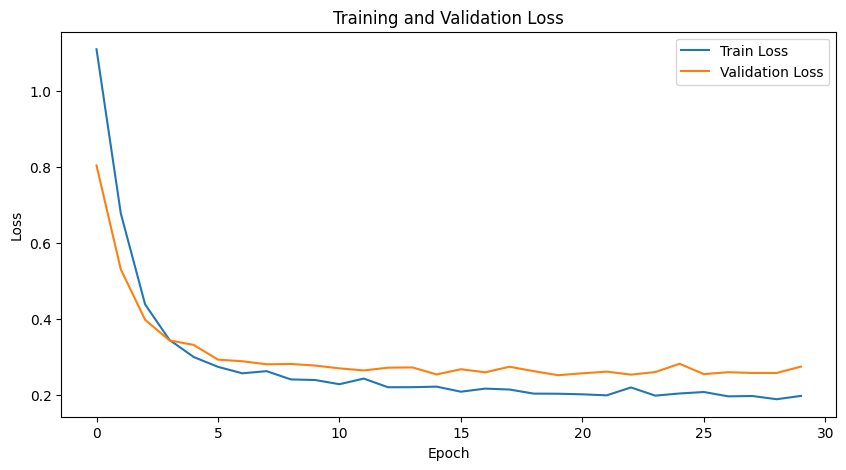

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Overfitting report

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3377
           1       0.75      0.93      0.83       273
           2       0.82      0.96      0.89       786
           3       0.27      0.91      0.42        58

    accuracy                           0.91      4494
   macro avg       0.71      0.92      0.77      4494
weighted avg       0.94      0.91      0.92      4494



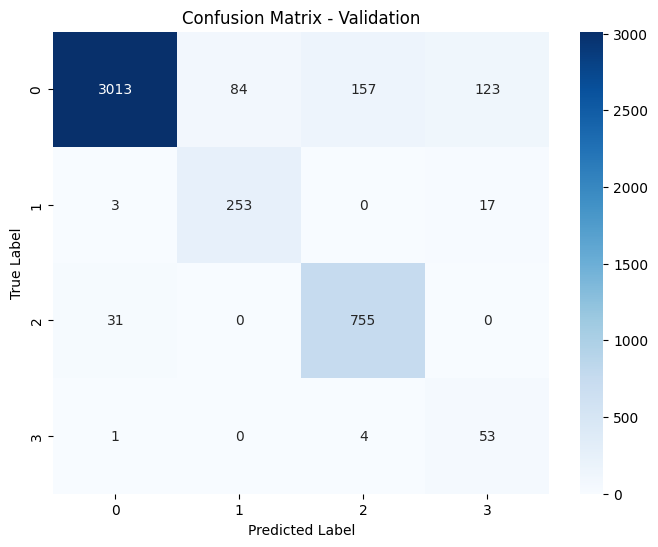

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.1589 seconds to execute.
The function took 0.0491 seconds to execute.
The function took 0.0486 seconds to execute.

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3379
           1       0.75      0.96      0.85       299
           2       0.82      0.96      0.88       764
           3       0.24      0.87      0.38        52

    accuracy                           0.91      4494
   macro avg       0.70      0.92      0.76      4494
weighted avg       0.94      0.91      0.92      4494



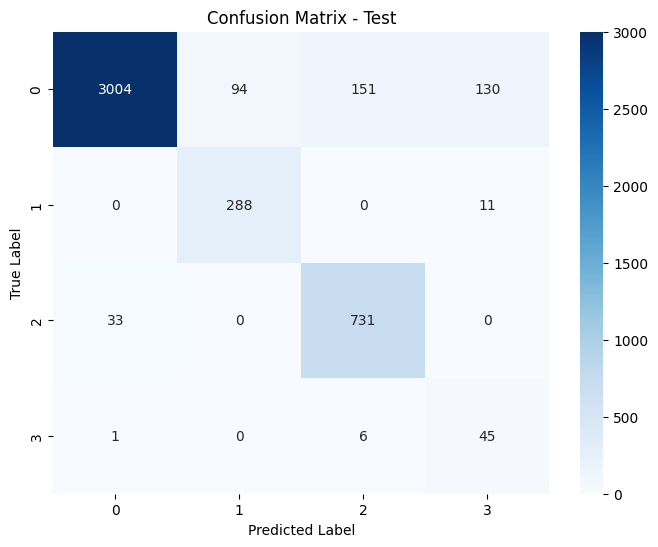

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train Accuracy: 90.0675%
Validation Accuracy: 90.6542%
Test Accuracy: 90.5207%

DROPOUT
Epoch 20/50, Train Loss: 0.3210, Val Loss: 0.2746
Early stopping at epoch 35 (best val loss: 0.263163)
The function took 14.0202 seconds to execute.


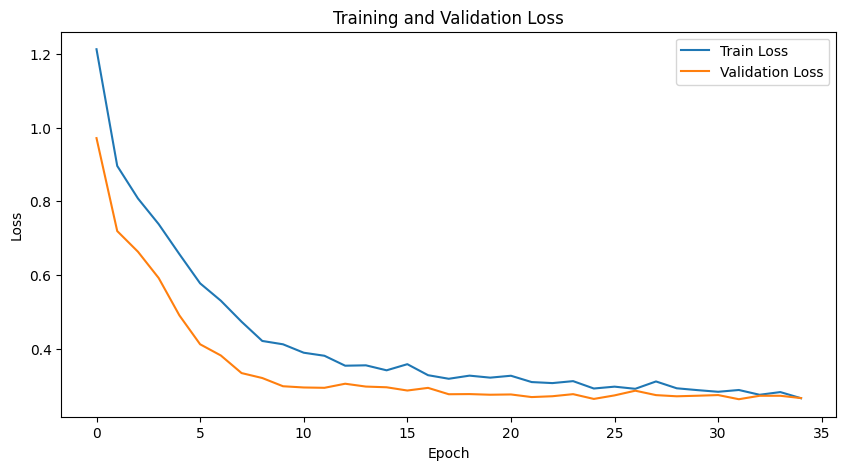

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Overfitting report - With Dropout

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3377
           1       0.73      0.93      0.82       273
           2       0.80      0.96      0.88       786
           3       0.39      0.91      0.55        58

    accuracy                           0.91      4494
   macro avg       0.73      0.93      0.80      4494
weighted avg       0.93      0.91      0.92      4494



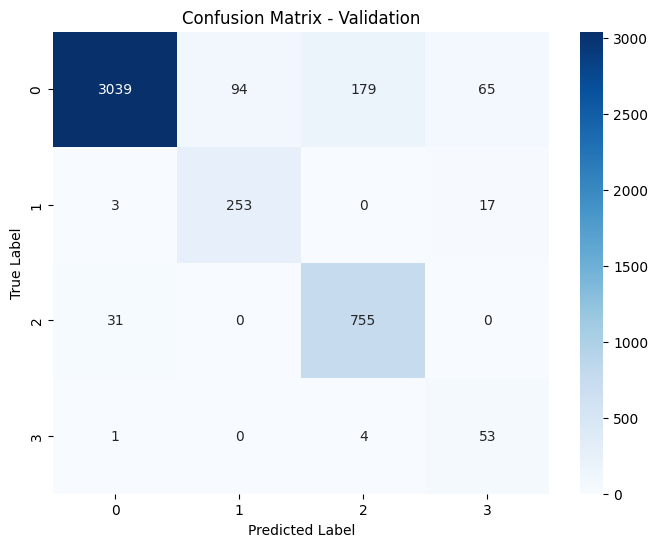

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.1770 seconds to execute.
The function took 0.0523 seconds to execute.
The function took 0.0511 seconds to execute.

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3379
           1       0.74      0.96      0.84       299
           2       0.81      0.96      0.87       764
           3       0.32      0.87      0.46        52

    accuracy                           0.91      4494
   macro avg       0.71      0.92      0.78      4494
weighted avg       0.93      0.91      0.92      4494



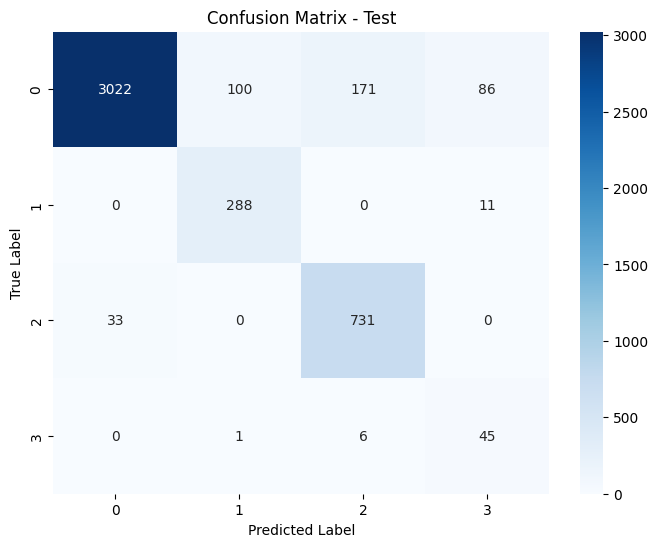

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train Accuracy: 90.7722%
Validation Accuracy: 91.2328%
Test Accuracy: 90.9212%

Batch Normalization
Epoch 20/50, Train Loss: 0.2189, Val Loss: 0.2242
Epoch 40/50, Train Loss: 0.1791, Val Loss: 0.2435
Early stopping at epoch 49 (best val loss: 0.212920)
The function took 24.1091 seconds to execute.


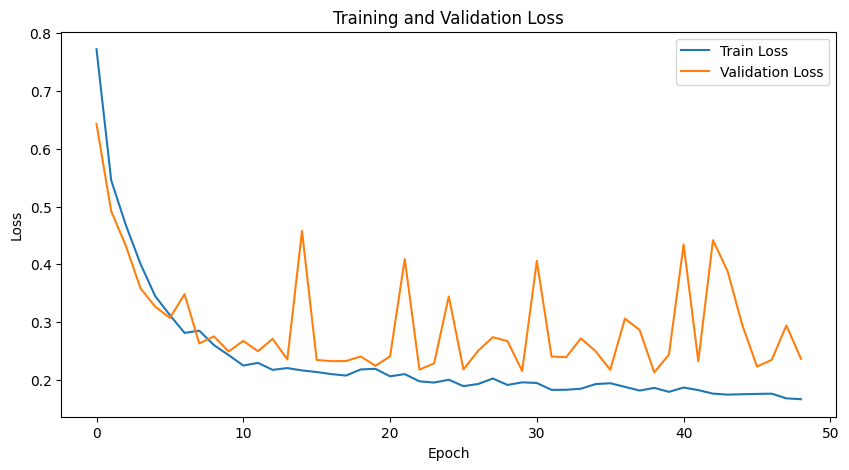

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Overfitting report - With Batch Normalization

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3377
           1       0.78      0.93      0.85       273
           2       0.91      0.94      0.93       786
           3       0.40      0.91      0.55        58

    accuracy                           0.94      4494
   macro avg       0.77      0.93      0.82      4494
weighted avg       0.95      0.94      0.94      4494



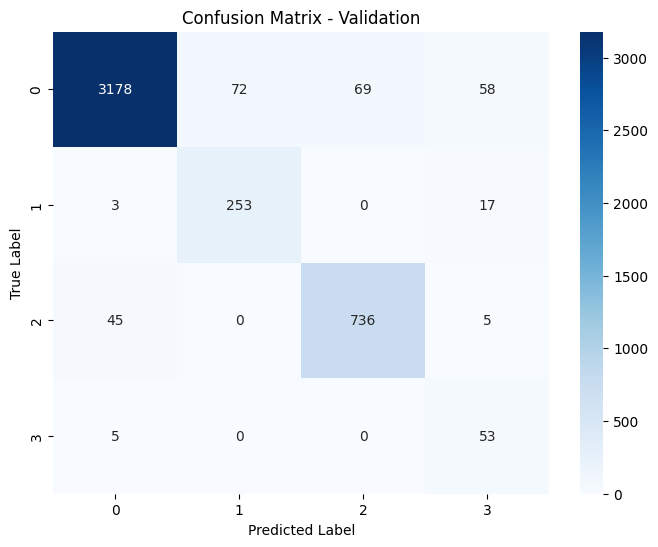

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.1960 seconds to execute.
The function took 0.0644 seconds to execute.
The function took 0.0638 seconds to execute.

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      3379
           1       0.77      0.96      0.85       299
           2       0.92      0.93      0.93       764
           3       0.33      0.85      0.48        52

    accuracy                           0.94      4494
   macro avg       0.75      0.92      0.80      4494
weighted avg       0.95      0.94      0.94      4494



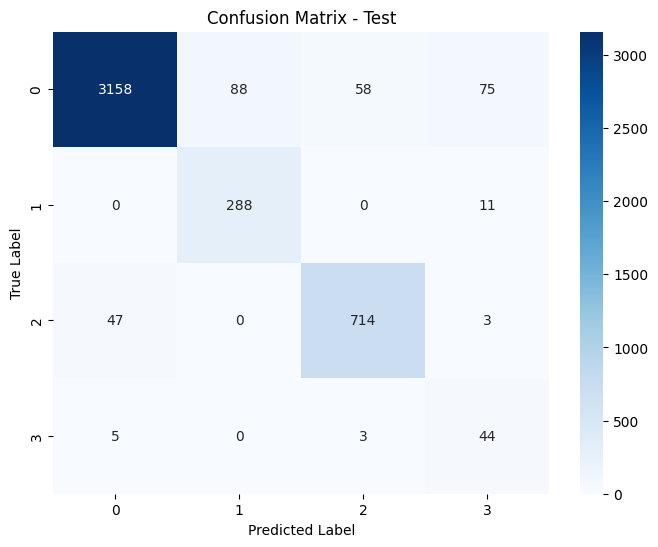

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train Accuracy: 93.5910%
Validation Accuracy: 93.9030%
Test Accuracy: 93.5470%

Weight Decay
Epoch 20/50, Train Loss: 0.2139, Val Loss: 0.2716
Early stopping at epoch 38 (best val loss: 0.264656)
The function took 14.3777 seconds to execute.


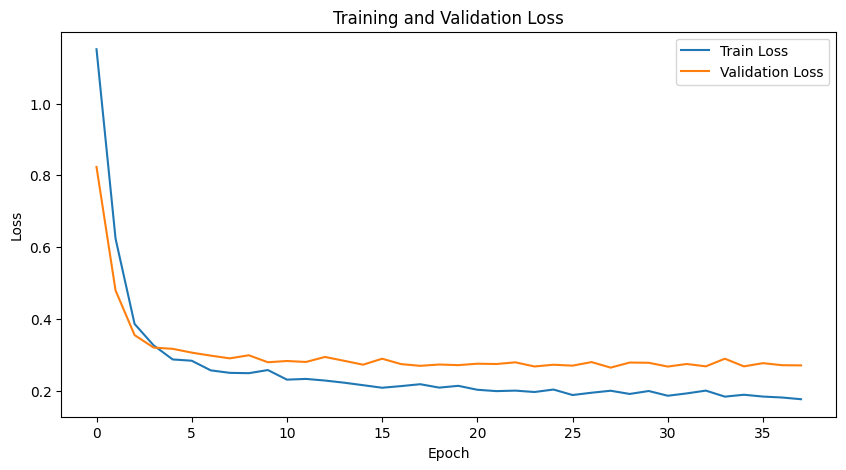

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Overfitting report - With Weight Decay

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.94      3377
           1       0.77      0.92      0.84       273
           2       0.84      0.89      0.86       786
           3       0.18      0.98      0.30        58

    accuracy                           0.89      4494
   macro avg       0.69      0.92      0.73      4494
weighted avg       0.94      0.89      0.91      4494



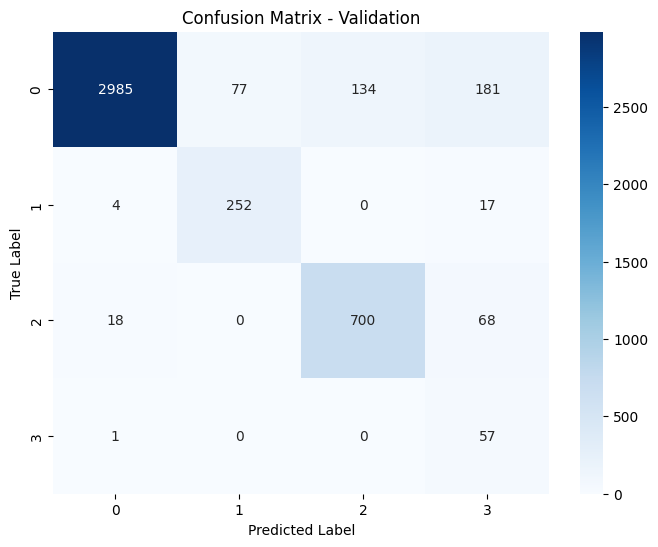

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The function took 0.1719 seconds to execute.
The function took 0.0505 seconds to execute.
The function took 0.0497 seconds to execute.

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      3379
           1       0.75      0.96      0.85       299
           2       0.84      0.88      0.86       764
           3       0.16      0.98      0.27        52

    accuracy                           0.89      4494
   macro avg       0.69      0.93      0.73      4494
weighted avg       0.94      0.89      0.91      4494



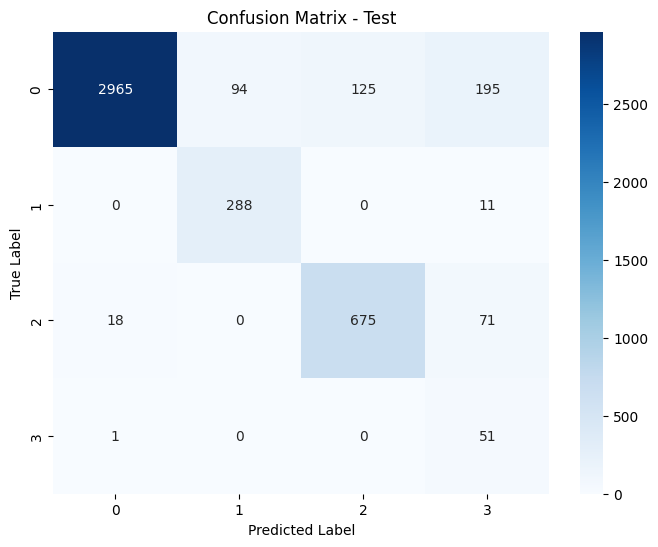

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train Accuracy: 88.8510%
Validation Accuracy: 88.8741%
Test Accuracy: 88.5403%


In [ ]:
batch_sizes = 128

architecture = [256, 128, 64, 32, 16]

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_sizes, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_sizes, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_sizes, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"The device is set to: {device}")

print(f"\n{'='*40}")
print(f"No normalization applied")
print(f"{'='*40}")
model = DeepNN(input_size=15, hidden_units_list= architecture)  # 15 features after removing port
model = model.to(device)

weights = torch.tensor(compute_class_weight(class_weight='balanced', classes=y_train_tensor.unique().numpy(), y=y_train_tensor.numpy()), dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = optim.AdamW(model.parameters(), lr=0.0005)

training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion,min_delta=0.001, patience=10)

print(f"\n{'='*40}")
print(f"Overfitting report")
print(f"{'='*40}")
val_accuracy, val_report, _, _ = evaluate_model(model, val_loader, device, f"Validation")

# Testing
train_accuracy = testing_model(model, train_loader, device)
val_accuracy = testing_model(model, val_loader, device)
test_accuracy = testing_model(model, test_loader, device)

evaluate_model(model, test_loader, device, f"Test")

print(f'Train Accuracy: {train_accuracy:.4f}%')
print(f'Validation Accuracy: {val_accuracy:.4f}%')
print(f'Test Accuracy: {test_accuracy:.4f}%')


# Now try dropout
print(f"\n{'='*40}")
print(f"DROPOUT")
print(f"{'='*40}")
model = DeepNN(input_size=15, hidden_units_list= architecture, use_dropout = True)  # 15 features after removing port
model = model.to(device)

weights = torch.tensor(compute_class_weight(class_weight='balanced', classes=y_train_tensor.unique().numpy(), y=y_train_tensor.numpy()), dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = optim.AdamW(model.parameters(), lr=0.0005)

training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion,min_delta=0.001, patience=10)

print(f"\n{'='*40}")
print(f"Overfitting report - With Dropout")
print(f"{'='*40}")
val_accuracy, val_report, _, _ = evaluate_model(model, val_loader, device, f"Validation")

# Testing
train_accuracy = testing_model(model, train_loader, device)
val_accuracy = testing_model(model, val_loader, device)
test_accuracy = testing_model(model, test_loader, device)

evaluate_model(model, test_loader, device, f"Test")

print(f'Train Accuracy: {train_accuracy:.4f}%')
print(f'Validation Accuracy: {val_accuracy:.4f}%')
print(f'Test Accuracy: {test_accuracy:.4f}%')

# Now try Batch Normalization
print(f"\n{'='*40}")
print(f"Batch Normalization")
print(f"{'='*40}")
model = DeepNN(input_size=15, hidden_units_list= architecture, use_batchnorm = True)  # 15 features after removing port
model = model.to(device)

weights = torch.tensor(compute_class_weight(class_weight='balanced', classes=y_train_tensor.unique().numpy(), y=y_train_tensor.numpy()), dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = optim.AdamW(model.parameters(), lr=0.0005)

training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion,min_delta=0.001, patience=10)

print(f"\n{'='*40}")
print(f"Overfitting report - With Batch Normalization")
print(f"{'='*40}")
val_accuracy, val_report, _, _ = evaluate_model(model, val_loader, device, f"Validation")

# Testing
train_accuracy = testing_model(model, train_loader, device)
val_accuracy = testing_model(model, val_loader, device)
test_accuracy = testing_model(model, test_loader, device)

evaluate_model(model, test_loader, device, f"Test")

print(f'Train Accuracy: {train_accuracy:.4f}%')
print(f'Validation Accuracy: {val_accuracy:.4f}%')
print(f'Test Accuracy: {test_accuracy:.4f}%')


# Now use AdamW's weight decay
print(f"\n{'='*40}")
print(f"Weight Decay")
print(f"{'='*40}")
model = DeepNN(input_size=15, hidden_units_list= architecture)  # 15 features after removing port
model = model.to(device)

weights = torch.tensor(compute_class_weight(class_weight='balanced', classes=y_train_tensor.unique().numpy(), y=y_train_tensor.numpy()), dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=0.001)

training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, criterion,min_delta=0.001, patience=10)

print(f"\n{'='*40}")
print(f"Overfitting report - With Weight Decay")
print(f"{'='*40}")
val_accuracy, val_report, _, _ = evaluate_model(model, val_loader, device, f"Validation")

# Testing
train_accuracy = testing_model(model, train_loader, device)
val_accuracy = testing_model(model, val_loader, device)
test_accuracy = testing_model(model, test_loader, device)

evaluate_model(model, test_loader, device, f"Test")

print(f'Train Accuracy: {train_accuracy:.4f}%')
print(f'Validation Accuracy: {val_accuracy:.4f}%')
print(f'Test Accuracy: {test_accuracy:.4f}%')



#### Question

Q: What do the losses look like? Is the model overfitting?

A: The losses, both the training one and the validation one, converge in few epochs and follow also a similar trend. The model is not overfitting: it is possible to see this fact by looking at the test accuracy, that is very close to the training and the validation accuracy.


Q: What impact do the different normalization techniques have on validation and testing performance?

A: